# Project 2


In [35]:
import numpy as np
from scipy.fft import rfft, fft, ifft, fftfreq, fftshift, ifftshift, fft2, ifft2
import matplotlib.pyplot as plt
import numba as nb
import csv
import pandas
import time

In this project we are going to look at interpolation, translation, signal decomposition. We therefore consider numerical methods for interpolation, signal and image processining using complex fourier series. Firstly we will consider periodic functions and signals. 

## Task 1: The (Discrete) Fourier Transform

### a

Prove that for any $k,h \in \mathbb{Z}$ we have:

$$
\big< e^{2 \pi i k \cdot}, e^{2 \pi i h \cdot} \big> =
\begin{cases}
1, \qquad \text{if} \; k = h\\ 
0, \qquad \text{else}
\end{cases}
$$

$$\begin{align*}
\big< e^{2 \pi i k \cdot}, e^{2 \pi i h \cdot} \big>
&= \int_{^-\frac{1}{2}}^\frac{1}{2} e^{2\pi i k x} e^{- 2\pi i k x} dx \\
&= \int_{^-\frac{1}{2}}^\frac{1}{2} e^{2\pi i (k-h) x} dx \\
&= \int_{^-\frac{1}{2}}^\frac{1}{2} (\cos(2\pi (k-h) x) + i \sin(2\pi(k-h) x)) dx \\
&= 2 \int_{0}^\frac{1}{2} \cos(2\pi (k-h) x) dx \\
&= \frac{2}{k-h} \sin(2\pi (k-h) x) \bigg|_0^\frac{1}{2} \\
&= \frac{2}{k-2} \sin(\pi (k-h)) \\
&= 0
\end{align*}$$

, since $k$ and $h$ are integers.

For $k=h$,

$$\begin{align*}
\big< e^{2 \pi i k \cdot}, e^{2 \pi i k \cdot} \big>
&= \int_{-\frac{1}{2}}^\frac{1}{2} e^{2\pi i k x} e^{- 2\pi i k x} dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} 1 dx \\
&= 1
\end{align*}$$




### b

In order to check this, we evaluate the inner product to see if we have the desired values.

*i.*

$$\begin{align*}
\big< \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi n x) \cos(2 \pi m x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} (\sin(2 \pi (n-m) x)) + \sin(2 \pi (n+m) x) dx \\
&= 0
\end{align*}$$

, since $\sin(x)$ is odd



*ii.*

For $n \ne m$:

$$\begin{align*}
\big< \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi n x) \sin(2 \pi m x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} (\cos(2 \pi (n-m) x)) - \cos(2 \pi (n+m) x) dx \\
&= 2\int_0^\frac{1}{2} (\cos(2 \pi (n-m) x)) dx - 2 \int_0^\frac{1}{2} \cos(2 \pi (n+m) x) dx \\
&= \frac{1}{\pi (n-m)} \sin(\pi (n-m)) - \frac{1}{\pi (n+m)} \sin(\pi (n+m)) \\
&= 0
\end{align*}$$

, since $\sin(x)$ is odd

For $n = m$:

$$\begin{align*}
\big< \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi n x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi n x) \sin(2 \pi n x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} (\cos(2 \pi (n-n) x)) - \cos(2 \pi (n+n) x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} 1 dx - 2 \int_0^\frac{1}{2} \cos(4 \pi n x) dx \\
&= 1 - \frac{1}{2 \pi n} \sin(2 \pi n) \\
&= 1
\end{align*}$$



*iii.*

For $n \ne m$: 

$$\begin{align*}
\big< \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi n x) \cos(2 \pi m x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} (\cos(2 \pi (n-m) x) + \cos(2 \pi (n+m) x)) dx \\
&= 2 \int_0^\frac{1}{2} (\cos(2 \pi (n-m) x) + \cos(2 \pi (n+m) x)) dx \\
&= \frac{\sin(\pi (n-m))}{\pi (n-m)} + \frac{\sin(\pi (n+m))}{\pi (n+m)} \\
&= 0
\end{align*}$$

, since $n$ and $m$ are integers.

For $n = m \ne 0$:

$$\begin{align*}
\big< \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi n x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi n x) \cos(2 \pi n x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} (\cos(2 \pi (n-n) x) + \cos(2 \pi (n+n) x)) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} 1 dx + 2 \int_0^\frac{1}{2} \cos(4 \pi x) dx \\
&= 1 + \frac{\sin(2 \pi n)}{2 \pi n} \\
&= 1
\end{align*}$$

For $n = m = 0$:
$$\begin{align*}
\big< \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi n x) \big>
&= 2 \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi 0 x) \cos(2 \pi 0 x) dx \\
&= \int_{-\frac{1}{2}}^\frac{1}{2} 2 dx \\
&= 2
\end{align*}$$

These calculated values are sufficient to prove that the functions form an orthonormal system.

$\newcommand{\span}[1]{\text{span}(#1)}$


### c

We want to find an orthonormal basis for the two spaces. 

*i.*

$$
\mathcal{T_n} := \span{e^{-2\pi in \cdot}, \dots, e^{2 \pi i n \cdot}} = \bigg\{ f \bigg| f(x) = \sum_{k=-n}^n c_k e^{2 \pi i k x}, \quad \text{where} \; c_{-n}, c_{-n+1}, \dots , c_n \in \mathbb{C} \bigg\}
$$

further restrict the coefficients to $c_k = \overline{c_{-k}}, \; k=0, \dots, n$

The orthonormal basis for $\mathcal{T_n}$ is,

$$\bigg\{e^{-2 \pi i n x}, \dots, e^{2 \pi i n x} \bigg\}$$

, since we know from **1a)** that:

$$
\big< e^{2 \pi i k \cdot}, e^{2 \pi i h \cdot} \big> =
\begin{cases}
1, \qquad \text{if} \; k = h\\ 
0, \qquad \text{else}
\end{cases}
$$

This shows that two different elements in the sets are orthonormal, and we know that an inner product of an element with itself is equal to the norm of said element, and as we see, this norm is equal to 1, thus demonstrating orthonormality.



*ii.*

$$\begin{align*}
\mathcal{S_n} :&= \span{\cos(0 \cdot), \cos(2 \pi \cdot), \dots, \cos(2 \pi n \cdot), \sin(2 \pi \cdot), \sin(2 \pi 2 \cdot), \dots, \sin(2 \pi n \cdot)} \\
&= \bigg\{ f \bigg| f(x) = \frac{a_0}{2} + \sum_{k=1}^n a_n \cos(2 \pi k x) + b_k \sin(2 \pi k x), \quad \text{where} \; a_0, a_1, \dots , b_1, \dots, b_n \in \mathbb{R} \bigg\}
\end{align*}$$

The orthonormal basis for $\mathcal{S_n}$ is,

$$\bigg\{ \sqrt{2}, \sqrt{2} \cos(2 \pi x), \dots, \sqrt{2} \cos(2 \pi n x), \sqrt{2} \sin(2 \pi x), \dots, \sqrt{2} \sin(2 \pi n x) \bigg\}$$

, since we know from **1b)** that:


$$\big< \sqrt{2} \sin(2\pi n x), \sqrt{2} \cos(2\pi m x) \big> = 0$$

$$
\big< \sqrt{2} \sin(2\pi n x), \sqrt{2} \sin(2\pi m x) \big> =
\begin{cases}
1, \qquad \text{if} \; n = m\\ 
0, \qquad \text{else}
\end{cases}
$$

$$
\big< \sqrt{2} \cos(2\pi n x), \sqrt{2} \cos(2\pi m x) \big> =
\begin{cases}
1, \qquad \text{if} \; n = m\\ 
0, \qquad \text{else}
\end{cases}
$$

*iii.*

Using the euler identity to prove that both spaces are the same:

$$\begin{align*}
\sum_{k=-n}^n c_k^{2 \pi i k x}
&= \sum_{k=-n}^n c_k (\cos(2 \pi k x) + i \sin(2 \pi k x)) \\
&= \sum_{k=-n}^n c_k \cos(2 \pi k x) + i c_k \sin(2 \pi k x) \\
\end{align*}$$

Now let $c_k = \frac{a_k}{2} - \frac{i b_k}{2}$ and $c_{-k} = \overline{c_k} = \frac{a_k}{2} + \frac{i b_k}{2}$, $a_k, b_k \in \mathbb{R}$, $k = 0,\dots,n$

$$\begin{align*}
\sum_{k=-n}^n c_k^{2 \pi i k x}
=& \sum_{k=0}^n \big( c_k \cos(2 \pi k x) + i c_k \sin(2 \pi k x) \big) + \sum_{k=-n}^{-1} \big( c_k \cos(2 \pi k x) + i c_k \sin(2 \pi k x) \big)\\

=& \sum_{k=0}^n \big( (\frac{a_k}{2} - \frac{i b_k}{2}) \cos(2 \pi k x) + i (\frac{a_k}{2} - \frac{i b_k}{2}) \sin(2 \pi k x) \big) + \sum_{k=1}^n \big( (\frac{a_k}{2} + \frac{i b_k}{2}) \cos(2 \pi k x) - i (\frac{a_k}{2} + \frac{i b_k}{2}) \sin(2 \pi k x) \big)\\

=& \sum_{k=0}^n \big( \frac{a_k}{2} \cos(2 \pi k x) - \frac{i b_k}{2} \cos(2 \pi k x) + \frac{i a_k}{2} \sin(2 \pi k x) + \frac{b_k}{2} \sin(2 \pi k x) \big)\\
&+ \sum_{k=1}^n \big( \frac{a_k}{2} \cos(2 \pi k x) + \frac{i b_k}{2} \cos(2 \pi k x) - \frac{i a_k}{2} \sin(2 \pi k x) + \frac{b_k}{2} \sin(2 \pi k x) \big)\\
=& \frac{a_0}{2} \cos(0) - \frac{i b_0}{2} \cos(0) + \frac{i a_0}{2} \sin(0) + \frac{b_0}{2} \sin(0) + \sum_{k=1}^n \big( a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x) \big) \\
=& \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x)
\end{align*}$$

When $b_0 = 0$, then: $\mathcal{T_n} = \mathcal{S_n}$

The dimension of $\mathcal{T_n}$ is as many basis vector the space is spanned by: $\dim(\mathcal{T_n}) = 2n + 1$


### d

We know that the real Fourier Series with period $1$ can be written as:

$$f(x) = \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x), \quad a_0, \dots, a_n, b_1, \dots, b_n \in \mathbb{R}$$ 

*i.*

Take the integral on the whole period from $-\frac{1}{2}$ to $\frac{1}{2}$ on both sides.

$$\begin{align*}
\int_{-\frac{1}{2}}^\frac{1}{2} f(x) dx
&= \int_{-\frac{1}{2}}^\frac{1}{2} \bigg[  \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x) \bigg] dx \\
&= \frac{a_0}{2} \int_{-\frac{1}{2}}^\frac{1}{2} dx + \sum_{k=1}^n \bigg( a_k \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi k x) dx + b_k \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi k x ) dx\bigg)\\
&= \frac{a_0}{2}
\end{align*}$$

Since integration of a whole period for $\sin(x)$ and $\cos(x)$ is $0$.

$$\Rightarrow a_0 = 2 \int_{-\frac{1}{2}}^\frac{1}{2} f(x) dx $$


*ii.*

Multiply on both sides with $\cos(2 \pi m x)$ and take the integral on the whole period. Using previous results from **1a)**, the integrals can often be simplified:

$$\begin{align*}
\int_{-\frac{1}{2}}^\frac{1}{2} f(x) \cos(2 \pi m x) dx
&= \int_{-\frac{1}{2}}^\frac{1}{2} \bigg[  \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x) \bigg] \cos(2 \pi m x) dx \\
&= \frac{a_0}{2} \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi m x) dx + \sum_{k=1}^n \bigg( a_k \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi k x) \cos(2 \pi m x) dx 
+ b_k \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi k x) \cos(2 \pi m x) dx \bigg) \\
&= \begin{cases}
\frac{a_k}{2}, \quad \text{for} \; k=m \\
0, \quad \text{else}
\end{cases}
\end{align*}$$

$$\Rightarrow a_k = 2 \int_{-\frac{1}{2}}^\frac{1}{2} f(x) \cos(2 \pi k x) dx $$

*iii.*

Multiply on both sides with $\sin(2 \pi m x)$ and take the integral on the whole period.

$$\begin{align*}
\int_{-\frac{1}{2}}^\frac{1}{2} f(x) \sin(2 \pi m x) dx
&= \int_{-\frac{1}{2}}^\frac{1}{2} \bigg[  \frac{a_0}{2} + \sum_{k=1}^n a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x) \bigg] \sin(2 \pi m x) dx \\
&= \frac{a_0}{2} \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi m x) dx + \sum_{k=1}^n \bigg( a_k \int_{-\frac{1}{2}}^\frac{1}{2} \cos(2 \pi k x) \sin(2 \pi m x) dx 
+ b_k \int_{-\frac{1}{2}}^\frac{1}{2} \sin(2 \pi k x) \sin(2 \pi m x) dx \bigg) \\
&= \begin{cases}
\frac{b_k}{2}, \quad \text{for} \; k=m \\
0, \quad \text{else}
\end{cases}
\end{align*}$$

$$\Rightarrow b_k = 2 \int_{-\frac{1}{2}}^\frac{1}{2} f(x) \sin(2 \pi k x) dx $$



### e 

We are going to show that one can write $c_k(f) \approx \hat{f}_k = \frac{1}{N} \sum_{j = 0}^{N-1} f_j e^{-2πijk/N}$ using the composite trapezoidal rule. 

Firstly we have: $$c_k(f) = \int_{-1/2}^{1/2} f(x) e^{-2πikx} dx, k = -n,...,n$$

And the composite trapezoidal rule: 
$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}f(a) + h \sum_{k=1}^{n-1} f(a+kh) + \frac{h}{2} f(b)$$ 
where $h = \frac{b-a}{n}$

We get
$$
c_k(f) = \int_{-1/2}^{1/2} f(x) e^{-2πikx} dx = \int_{0}^{1} f(x) e^{-2πikx} dx
$$

Here we use the fact that $c_k$ is 1-periodic such that we can move our integration-interval to $[0,1]$. Using $f(x_j) = f_j$, $g(x) = f(x)e^{-2πikx}$ and the fact that $g(0) = g(1)$ due to 1-periodicity, we get

$$
\int_{0}^{1} g(x) dx \approx  \frac{h}{2}g(0) + h \sum_{j=1}^{N-1} f_je^{-2πikj/N} + \frac{h}{2} g(1) = hg(0) + h \sum_{j=1}^{N-1} f_je^{-2πikj/N} \\
= h  \sum_{j=0}^{N-1} f_je^{-2πikj/N} = \frac{1}{N}  \sum_{j=0}^{N-1} f_je^{-2πikj/N} = \hat{f}_k \quad \square
$$

Furthermore, we are going to show that $\hat{f}$ is N-periodic

$$
\hat{f}_{k+N} = \frac{1}{N}  \sum_{j=0}^{N-1} f_je^{-2πi(k+N)j/N} = \hat{f}_{k+N} = \frac{1}{N}  \sum_{j=0}^{N-1} f_je^{-2πikj/N}e^{-2πiNj/N}  \\
= \sum_{j=0}^{N-1} f_je^{-2πikj/N} (\cos(-2πj) + i\sin(-2πj))
$$

The $\cos$-and $\sin$-term is $1$ and $0$, respectfully, for all $j \in [0,1,....N-1]$
$$
\sum_{j=0}^{N-1} f_je^{-2πikj/N} (\cos(-2πj) + i\sin(-2πj)) = \sum_{j=0}^{N-1} f_je^{-2πikj/N} = \hat{f}_k 
$$

To sum up, $\hat{f}_k = \hat{f}_{k+N}$, hence $\hat{f}_k$ is N-periodic. $\quad \square$

What does this mean for the approximation we are looking at here? Well, essentally, if we want an approximation for a set of coefficients $\hat{f}_{k + cN}$, we could just use $c_k$. This is actually really usefull as the approximation $c_k$ will be increasingly poor as $k$ increases, a result from Riemann-Lebesque lemma. Therefore, we do not really want to approximate and $\hat{f}_{k}$ with $c_k$ for any $k$ larger than $N$. Instead we could simply subtract a whole number of periods until we come to the equivalent set of coefficients that exist in the first period, and then approximate, yielding a better result.

### f

In this task we are going to prove that

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{2πijk/N} = 

\begin{cases}
 1& \text{ if $k$ mod $N$ } \equiv 0 \\
 0& \text{ else }  
\end{cases}

$$


For $ N \in \mathbb{N}$ and $k \in \mathbb{Z}$.

Firstly, we know that if $k$ mod $N$ = 0, then $\frac{k}{N} \in \mathbb{N}$. 

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{2πijk/N} = \frac{1}{N} \sum_{j=0}^{N-1} (\cos(-2πj \frac{k}{N}) + i\sin(-2πj \frac{k}{N}))
$$

We see that if $\frac{k}{N} \in \mathbb{N}$, then we have a multiplum of 2π in both the cosine and sine term for each j. Then,

$$
\frac{1}{N} \sum_{j=0}^{N-1} (\cos(-2πj \frac{k}{N}) + i\sin(-2πj \frac{k}{N})) = \frac{1}{N} \sum_{j=0}^{N-1} 1 = \frac{1}{N} N = 1
$$

Secondly, we look at the case when $k$ mod $N$ ≠ 0

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{2πijk/N} = \frac{1}{N} \sum_{j=0}^{N-1} (e^{-2πik/N})^j
$$

We recognize the term above as a geometric sequence. As a result, we can use the formula for the sum of a geometric sequence

$$
\frac{1}{N} \sum_{j=0}^{N-1} (e^{-2πik/N})^j = \frac{1}{N} \frac{1-(e^{-2πik/N})^N}{1-e^{-2πik/N}} = \frac{1}{N} \frac{1-e^{-2πik}}{1-e^{-2πik/N}}
$$

We know that $e^{-2πik} = 1 \quad \forall \quad k \in \mathbb{Z}$. Hence 

$$
\frac{1}{N} \frac{1-e^{-2πik}}{1-e^{-2πik/N}} = \frac{1}{N} \frac{1-1}{1-e^{-2πik/N}} = 0 
$$

This completes the proof $\quad \square $

### g

In this task we are going to show that the Fourier matrix diagonalizes the circulant matrix:

$$
\textrm{circ }\mathbf{a} = N^2\overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}})\mathcal{F}_N
$$

To begin with, we calculate the Fourier transform $\hat{\mathbf{a}}$ of $\mathbf{a}$ and diag(${\hat{\mathbf{a}}}$):

$$
\hat{\mathbf{a}} = \mathcal{F}_N \mathbf{a} = \frac{1}{N} \left ( e^{-2πikl/N} \right )_{k,l=0}^{N-1} \left ( a_k \right )_{k=0}^{N-1} = \underline{\frac{1}{N} \left ( \sum_{q=0}^{N-1}e^{-2πiqk/N} a_q \right )_{k,l=0}^{N-1}} \\
$$
$$
\implies \textrm{diag}({\hat{\mathbf{a}}}) = \underline{\frac{1}{N} \left ( \delta_{kl} \sum_{q=0}^{N-1}e^{-2πiqk/N} a_q \right )_{k,l=0}^{N-1}}
$$

Where $\delta_{ij}$ is the kronecker delta.

Now we want to calculate $\overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}})\mathcal{F}_N$:

$$
\overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}}) = \frac{1}{N^2} \left ( e^{2πikl/N} \right )_{k,l=0}^{N-1} \frac{1}{N} \left ( \delta_{kl} \sum_{q=0}^{N-1}e^{-2πiqk/N} a_q \right )_{k,l=0}^{N-1} \\

=  \frac{1}{N^2} \left ( \sum_{q, r=0}^{N-1} e^{2πikr/N} \delta_{rl} e^{-2πiqr/N} a_q \right )_{k,l=0}^{N-1}\\

\implies \overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}})\mathcal{F}_N = \frac{1}{N^3} \left ( \sum_{q, r=0}^{N-1} e^{2πikr/N} \delta_{rl} e^{-2πiqr/N} a_q \right )_{k,l=0}^{N-1} \left ( e^{-2πikl/N} \right )_{k,l=0}^{N-1}\\
= \frac{1}{N^3} \left ( \sum_{q,r,t=0}^{N-1} e^{2πikr/N} \delta_{rt}  a_q  e^{-2πiqr/N} e^{-2πitl/N} \right )_{k,l=0}^{N-1}
$$

We know that the kroencker delta is zeros unless $t=r$. Setting $t=r$ gives

$$
\frac{1}{N^3} \left ( \sum_{q,r=0}^{N-1} e^{2πikr/N}  a_q  e^{-2πiqr/N} e^{-2πirl/N} \right )_{k,l=0}^{N-1} = \frac{1}{N^3} \left ( \sum_{q,r=0}^{N-1} a_q e^{2πikr/N-2πiqr/N-2πirl/N} \right )_{k,l=0}^{N-1} =  \frac{1}{N^3} \left ( \sum_{q,r=0}^{N-1} a_q e^{-2πir(q+l-k)/N} \right )_{k,l=0}^{N-1}\\

\frac{1}{N^2} \left ( \sum_{q=0}^{N-1} a_q \frac{1}{N} \sum_{r=0}^{N-1}  e^{-2πir(q+l-k)/N} \right )_{k,l=0}^{N-1}
$$

Applying the formula from 1f) to the sum over r, we see that:

$$
\frac{1}{N} \sum_{r=0}^{N-1}  e^{-2πir(q+l-k)/N} 
= \begin{cases}
1 & \text{ if } (q+l-k)\text{ mod } N \equiv 0\\
0 & \text{ else } 
\end{cases}
$$

Meaning that unless $q = k-l + sN, s \in \mathbb{Z}$ the entire sum becomes zero. Therefore, the only terms left are the $a_q$'s for $q = k-l + sN, s \in \mathbb{Z}$. One can recognize this term as $q = (k-l) \text{ mod } N$. From this we get that 

$$
\overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}})\mathcal{F}_N = \frac{1}{N^2} \left ( a_{k-l \text{ mod } N}\right)^{N-1}_{k,l=0}

$$
$$
\implies N^2\overline{\mathcal{F}_N}\textrm{diag}(\hat{{\mathbf{a}}})\mathcal{F}_N = \text{circ }\mathbf{a}
$$

This completes the proof that $\mathcal{F}_N$ diagonalizes the circulant matrix. We know that the values on the diagonal of $\text{diag } \hat{\mathbf{a}}$ are the eigenvalues of the circulant matrix. 

Now we want to derive a formula for the inverse $\mathcal{F}_N^{-1}$. We know that a matrix $A$ is diagonalizable if $A = PDP^{-1}$, where $D$ is a diagonal matrix and $P$ is an invertible matrix. By comparing this to what we just proved, we can make an assumption that $\mathcal{F}_N^{-1}$ is closely related to $\overline{\mathcal{F}_N}$. If this assumption is correct, we should get $\overline{\mathcal{F}_N}\mathcal{F}_N = I$ or something close to the identity matrix $I$. 

$$
\overline{\mathcal{F}_N}\mathcal{F}_N = \frac{1}{N^2}\left ( e^{2πikl/N}\right )_{k,l = 0}^{N-1}\left ( e^{-2πikl/N}\right )_{k,l = 0}^{N-1} = \frac{1}{N}\left ( \frac{1}{N}\sum^{N-1}_{t=0} e^{2πit(l-k)/N}\right )^{N-1}_{k,l=0}\\
$$

We recognize the term inside the brackets from 1f). Consequently we know that this term is 1 if ${l-k} \text{ mod } N \equiv 0$ and 0 otherwise. Then we have that $l-k = sN, s \in \mathbb{Z} \implies l = sN + k \text{ and } k = l - sN$. In order to fulfill the modulo equation and still get $l$ and $k$ values in our interval, $s=0$ such that $k=l$. With $l=k$ we get a diagonal matrix:

$$
\overline{\mathcal{F}_N}\mathcal{F}_N = \frac{1}{N}\left ( \delta_{kl} 1 \right )_{k,l= 0}^{N-1} = \frac{1}{N} I\\
$$
$$
\implies \mathcal{F}_N^{-1} = N \overline{\mathcal{F}_N} \quad \square
$$
where $\delta_{kl}$ is the kroenecker delta. 


### h

Consider the following functions:

\begin{align*}
& f_1(x) = \sin(8 \pi x), \quad x \in \mathbb{T} \\
& f_2(x) = \sin(32 \pi x) + \cos(128 \pi x), \quad x \in \mathbb{T} \\
& f_3(x) = x, \quad x \in \mathbb{T} \\
& f_4(x) = 1 - |x|, \quad x \in \mathbb{T}
\end{align*}

with $N = 5, 17, 257$.

Plotting $f$ and $\hat{f}$:

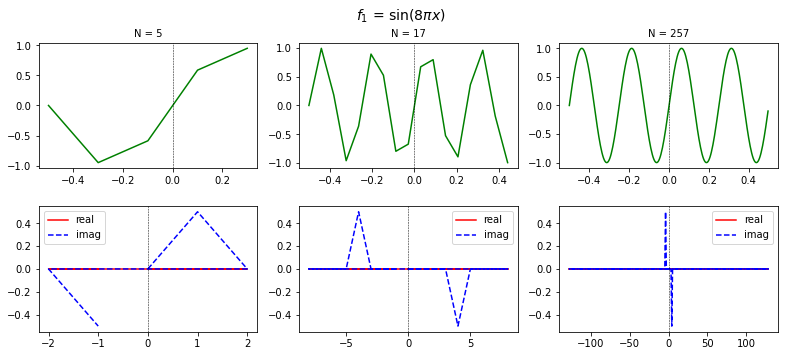

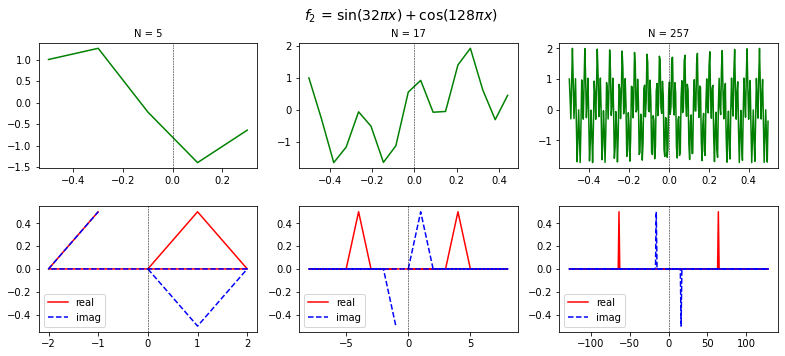

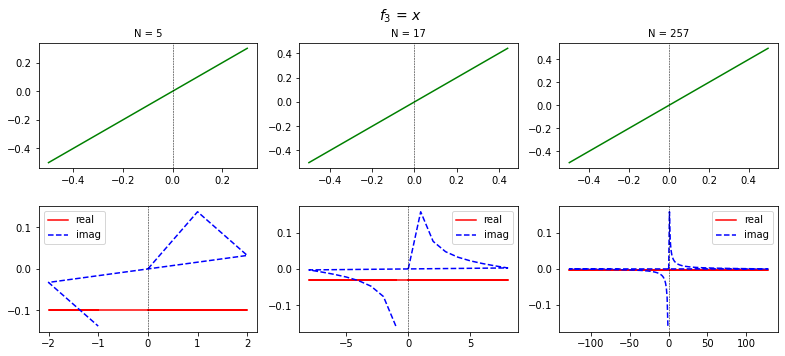

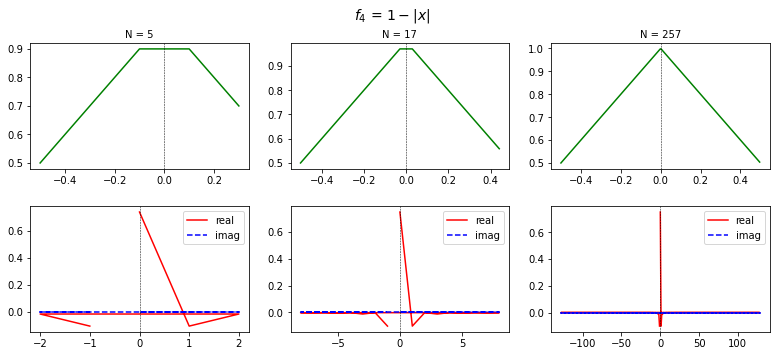

In [36]:
N = [5, 17, 257]

def f_1(x):
    return np.sin(8*np.pi*x)
def f_2(x):
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)
def f_3(x):
    return x
def f_4(x):
    return 1 - np.abs(x)

def transform(f, N, start=0.0):
    x = np.linspace(start, start+1, N, endpoint=False)
    return x, f(x)

func = [f_1, f_2, f_3, f_4]
labels = ['$\sin(8 \pi x)$', '$\sin(32 \pi x) + \cos(128 \pi x)$', '$x$', '$1 - |x|$']

for i in range(len(func)):
    fig, axs = plt.subplots(2, 3, figsize=(11,5))
    fig.suptitle(f'$f_{i+1}$ = {labels[i]}', size=14)
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.3)
    for j in range(len(N)):
        x, y = transform(func[i], N[j],-1/2)
        yf = fft(y)
        xf = fftfreq(N[j], 1/N[j])
        axs[0,j].plot(x, y, 'g')
        axs[0,j].set_title(f'N = {N[j]}', size=10)
        axs[0,j].axvline(0, color='black', linestyle = '--', linewidth=0.5)
        axs[1,j].plot(xf, np.real(yf)/N[j], 'r', label='real')
        axs[1,j].plot(xf, np.imag(yf)/N[j], 'b--', label='imag')
        axs[1,j].axvline(0, color='black', linestyle = '--', linewidth=0.5)
        axs[1,j].legend()
    plt.show()


We see obviously that for more sample points $N$, $f$ approximates better. To be more specific, the number of sample points $N$ has to be atleast larger than twice the frequency, such that these waves are included in the samples. For example $f_2$, which has a large frequency, needs a larger $N$, while $f_1$ which has a smaller frequency, has less need for a larger $N$. In addition, we see that the odd functions $f_1$ and $f_3$, has only imaginary fourier coefficients. $f_3$, which is even, only has real coefficients. $f_2$ which has both, has both imaginary and real coefficients. This correct according to the complex fourier series, where the cosinus term is real and sinus term is imaginary.


*i.*

Plotting $f_2(x) = \sin(32 \pi x) + \cos(128 \pi x)$ and its fourier coefficients:

freqencies for N = 17,  [-4. -1.  1.  4.]
freqencies for N = 65,  [-16.  -1.   1.  16.]
freqencies for N = 257,  [-64. -16.  16.  64.]


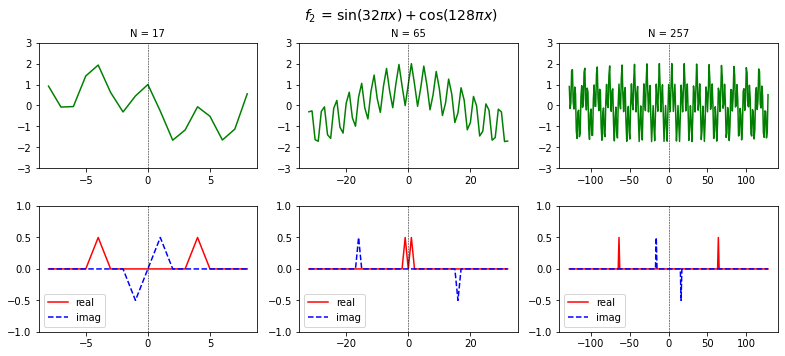

In [37]:
N = [17, 65, 257]

fig, axs = plt.subplots(2, 3, figsize=(11,5))
fig.suptitle(f'$f_2$ = {labels[1]}', size=14)
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
for j in range(len(N)):
    x, y = transform(func[1], N[j],-1/2)
    x = np.linspace(-1/2, 1/2, N[j], endpoint=False)
    yf =  fftshift(fft(y))
    xf = fftshift(fftfreq(N[j], 1/N[j]))
    freq = xf[np.argwhere(abs(yf) > 0.1)]
    print(f'freqencies for N = {N[j]}, ', freq.T[0])
    
    axs[0,j].plot(xf, fftshift(y), 'g')
    axs[0,j].set_title(f'N = {N[j]}', size=10)
    axs[0,j].axvline(0, color='black', linestyle = '--', linewidth=0.5)
    axs[0,j].set_ylim(-3,3)

    axs[1,j].plot(xf, np.real(yf)/N[j], 'r', label='real')
    axs[1,j].plot(xf, np.imag(yf)/N[j], 'b--', label='imag')
    axs[1,j].axvline(0, color='black', linestyle = '--', linewidth=0.5)
    axs[1,j].set_ylim(-1, 1)
    axs[1,j].legend(loc = 'lower left')
plt.show()

We can see that this function has a period of 1. Using this we get that the Fourier series describing this function is on the form:
$$
   f \sim  \sum_{n=0}^{\infty} a_n \cos(2\pi x n) + b_n \sin(2\pi x n)
$$

We can quite simply see what values of $n$ makes this similarity work. We get that:
$$
\begin{split}
a_k = 
    \begin{cases}
    1, \text{for} \; k = 64 \\
    0, \; \text{else}
    \end{cases}
\\
b_k = 
    \begin{cases}
    1, \text{for} \; k = 16 \\
    0, \; \text{else}
    \end{cases}
\end{split}
$$

*ii.*

We have the following relation and $c_k$ factors for positive k:
$$
    c_k = \frac{a_k - i b_k}{2}
$$

For negative $k$ s we simply have to conjugate:
$$
    c_{-k} = \bar{c_k}

$$
So, when we are computing the complex coefficients we look at the sum from $-N$ to $N$, so we actually get only four nonzero values for $c_k$
$$
    \begin{split}
        c_{16} = \frac{a_{16} - i b_{16}}{2} = -\frac{1}{2}i \\
        c_{-16} = \frac{a_{-16} - i b_{-16}}{2} = \frac{1}{2}i \\ 
        c_{64} = \frac{a_{64} - i b_{64}}{2} = \frac{1}{2} \\ 
        c_{-64} = \frac{a_{-64} - i b_{-64}}{2} = \frac{1}{2} \\
    
    \end{split}
$$

We see that these results agrees with our plot and frequencies at $N = 257$. For $N = 65$ the lower frequency coefficients $c_{\pm 16}$ are includes in the sample, but not the higher frequencies $c_{\pm 64}$.

*iii.* 

The *fftshift* function in numpy centers the spectrum at the zero-frequency. Which means that the intervall is split in two, and swapped, hence centered at zero. 

*iv.*

So far we have found the four complex coeffiecients needed to represent $f_2$ as a fourier series. 



Eulers identity states that: $e^{ix} = \cos(x) + i \sin(x)$, and we want to use this to remove the second summand in $f_2$

With our new complex coefficients $c_k$ we can write $f_2$ as:
$$\begin{align*}
f(x) &= \sum_{k = -N}^{N} c_k e^{2 \pi i k x} = \frac{1}{2} e^{ \pi (-i) 128 x} + \frac{i}{2} e^{ \pi(-i) 32 x} + \frac{-i}{2} e^{ \pi i 32 x} + \frac{1}{2} e^{ \pi i 128 x} \\
&= \frac{1}{2} \left( \cos(-128 \pi x) + i \sin(-128 \pi x) \right) + \frac{i}{2} \left( \cos(-32 \pi x) + i \sin(-32 \pi x) \right) \\
&+ \frac{-i}{2} \left( \cos(32 \pi x) + i \sin(32 \pi x) \right) +\frac{1}{2} \left( \cos(128 \pi x) + i \sin(128 \pi x) \right)
\end{align*}$$
Using the fact that $\sin(-x) = -\sin(x)$ and $\cos(-x) = \cos(x)$ we can rewrite and get:
$$
\sin(32 \pi x) + \cos(128 \pi x)
$$
So, exactly $f_2$. So how could we modify the $c_k$ coeffiecients to remove the second summand; $\cos(128 \pi x)$? Well, by tracking back what we have just done we see that if we simply only take imaginary part of $\hat{f}$ the $\cos$ term disappears, and we are left with the odd part $\sin$. 

*v.*

In the case where $N = 17$ we will never sum over the two coeffiecients $c_{-64}$ and $c_{64}$, so we will never see the last summand. This is due the the fact that in order to get a correct sampling of a wave, we have to have a sample frequency that is more than double of the waves frequency. 

## Task 2: Interpolation and Translation invariant Spaces

### a 

Prove the Aliasing formula:
$$
    \hat{f}_k = \sum_{l \in \mathbb{Z}} c_{k+lN}(f) \;\;\; k \in \mathbb{Z}
$$
We want to do this using the result from task 1f):
$$
    \frac{1}{N} \sum_{j=0}^{N-1} e^{-2\pi i j k /N} = 
    \begin{cases}
    1 \;\; if \;\; k \mod N \equiv 0 \\
    0 \;\; else
    \end{cases}
$$
From 1e) we have the following expression:
$$
    \hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-2\pi i j k /N}
$$
Generally we know that $f(x)$ has the following Fourier expression:
$$
    f(x) = \sum_{q \in \mathbb{Z}} c_q(f)e^{2\pi i q x}
$$
(I use q here as I do not want to mix up the k in this expression and the other.)

We combine these two equations to get:
$$
    \hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} \left( \sum_{q \in \mathbb{Z}} c_q(f)e^{2\pi i q x_j} \right) e^{-2\pi i j k /N}
$$
From here, in order to merge the two exponentials, se use that $x_j = \frac{j}{N}$:
$$
    \hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} \left( \sum_{q \in \mathbb{Z}} c_q(f)e^{2\pi i (p-k) / N} \right)
$$
From here we can reorder terms to make use of the result in 1f):
$$
    \hat{f}_k = \sum_{q \in \mathbb{Z}} c_q(f) \left(\frac{1}{N}  \sum_{j=0}^{N-1} e^{2\pi i (p-k) / N} \right)
$$
Using the case based statement in 1f) we see that this expression has the following possible values:
$$
    \hat{f}_k =  \begin{cases}
    \sum_{q \in \mathbb{Z}} c_q(f) \;\; \textit{if} \;\; (q-k) \mod{N} \equiv 0 \\
    0 \;\;\; \textit{else}
    \end{cases}
$$
Since $(q-k) mod(N) \equiv 0$, we know that $\frac{q-k}{N}$ is some integer. We can make this integer our $l$! So we got $\frac{q-k}{N} = l \longrightarrow q = k + lN$. With this we arrive at the aliasing formula.
$$
    \hat{f}_k = \sum_{q \in \mathbb{Z}} c_q = \sum_{l \in \mathbb{Z}} c_{k+lN}
$$

### b

We have the following definition for the constants:
$$
    c_n(f) = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x)e^{-2\pi i k x} dx = \left< f(x), e^{2\pi i k \cdot} \right>
$$
The shift function is defined as following:
$$    \tau_N f = f(- \frac{1}{N})
$$So $c_k(\tau_N f)$ can be calculated by doing the shift in the inner product for the definition of $c_k$:
$$
\begin{split}
    & c_n(\tau_N f) = \left< f(x - \frac{1}{N}), e^{2\pi i k \cdot} \right> \\
    & = \left< f(x - \frac{1}{N}), e^{-2\pi i k / N} e^{2\pi i k /N }e^{2\pi i k \cdot} \right> \\ 
    & = e^{-2\pi i k /N} \left< f(x - \frac{1}{N}), e^{-2\pi i k / N}  e^{2\pi i k \cdot} \right> \\ 
    & = e^{-2\pi i k /N} \left< f(x - \frac{1}{N}), e^{2\pi i k (- \frac{1}{N})} \right> \\ 
    & =e^{-2\pi i k /N} \int_{0}^{1} f(x-\frac{1}{N})e^{-2\pi i k (x - \frac{1}{N})} dx \\
\end{split}
$$
$$
\begin{split}
    & =e^{-2\pi i k /N} \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x-\frac{1}{N})e^{-2\pi i k x} dx \\
    & = e^{-2\pi i k /N} c_k(f)
\end{split}
$$
Now we need to find a formula for the more general shift. Essentially we are doing a $\tau_N$ shift $j$ times. So we quite simply get a $j$ in the exponent: 
$$
    c_k(\tau_{N}^{j}f) = e^{-2\pi i j k /N} c_k(f)
$$

### c

Let $g \in V_{N,f}$, as in in (3) show that $\tau_{N}g \in V$

As $g$ is in $V$, we know that $g$ can be expressed as some linear combination of shifts of $f$:
$$g = \sum_{j=0}^{N-1} a_j f \left(x - \frac{j}{N} \right)$$

Now we want to check if $\tau_N g$ is in $V$
$$
\begin{split}
    &\tau_N g = \tau_N \sum_{j=0}^{N-1} a_j f \left(x - \frac{j}{N} \right) \\
    & = \sum_{j=0}^{N-1} a_{j} f \left(x - \frac{j+1}{N} \right)  \\
\end{split}
$$
Here we can rewrite for new coefficients: $\tilde{a}$, where $\tilde{a}_j = a_{j+1}$.
$$
    \sum_{j=0}^{N-1} \tilde{a}_j f \left(x - \frac{j}{N} \right) 
$$
From this we see that $\tau_N g$ is in $V$. And we have already stated the coefficients as $\tilde{a}_j = a_{j+1}$.

### d

In this task we are going to prove that 

$$
G = \left (
 \left< \tau^{l}_N f, \tau^j_N f \right>
\right )^{N-1}_{l,j = 0} \quad \in \mathbb{C}
$$

is a circulant matrix. Here we can use Parsevals identity and the results from 2b).

$$
G = \left (
\sum_{k \in \mathbb{Z}} c_k(\tau^{l}_N f) \overline{c_k(\tau^j_N f)}
\right )^{N-1}_{l,j = 0} 
= 
\left (
\sum_{k \in \mathbb{Z}} c_k(f) \overline{c_k(f)} e^{-2πilk/N} e^{2πijk/N}
\right )^{N-1}_{l,j = 0} 
= 
\left (
\sum_{k \in \mathbb{Z}} c_k(f) \overline{c_k(f)} e^{-2πik(l-j)/N} 
\right )^{N-1}_{l,j = 0} 
$$


One can see from the (l-j)/N term in the exponent of $e$ that this is a circulant matrix. Furthermore, we can see what the diagonal matrix in Task 1g) look like in this case. We have that:

$$
G = \left (
\sum_{k \in \mathbb{Z}} c_k(f) \overline{c_k(f)} e^{-2πik(l-j)/N} 
\right )^{N-1}_{l,j = 0} = \left (
\sum_{k \in \mathbb{Z}}  \left| c_k(f) \right|^2 e^{-2πik(l-j)/N} 
\right )^{N-1}_{l,j = 0}
= \left ( a_{(l-j)\textrm{ mod } N} \right )^{N-1}_{l,j = 0}
$$

In order to find the diagonal matrix $\textrm{diag}(\hat{\mathbf{a}})$, we have to derive the vector $\mathbf{a} = (a_0,a_1,...,a_{N-1})$. For a circulant matrix we have that $\mathbf{a}$ appears in the first column. Consequently, $\mathbf{a}$ takes the form:

$$
\mathbf{a} =  \left ( \sum_{k \in \mathbb{Z}} \left| c_k(f)\right|^2 e^{-2πikr/N} \right )^{N-1}_{r=0}
$$


Have that $\hat{\mathbf{a}} = \mathcal{F}_N\mathbf{a}$


$$
\implies \hat{a}_r = \frac{1}{N} \left( \sum_{l=0}^{N-1} e^{-2πirl/N} \sum_{k \in \mathbb{Z}} \left| c_k(f)\right|^2 e^{-2πikl/N}\right) = \frac{1}{N} \left( \sum_{l=0}^{N-1} \sum_{k \in \mathbb{Z}} \left| c_k(f)\right|^2 e^{-2πikl/N} e^{-2πirl/N}\right) = \frac{1}{N} \left( \sum_{l=0}^{N-1} \sum_{k \in \mathbb{Z}} \left| c_k(f)\right|^2 e^{-2πil(k+r)/N}\right)
$$

From 1f) we know that if $(k+r) \textrm{ mod } N \not\equiv 0$, the sum over the $e$-term will be zero. We are interested in the non-trivial soultion, hence we consider the case when $(k+r) \textrm{ mod } N \equiv 0$. In addition, $(k+r) \textrm{ mod } N \equiv 0 \Leftrightarrow k = -r + sN, s \in \mathbb{Z}$. This yields

$$
\hat{a}_r = \frac{1}{N} \left(\sum_{l=0}^{N-1} \sum_{s \in \mathbb{Z}} \left| c_{r+sN}(f)\right|^2 e^{-2πil(sN)/N}\right)  = \left( \sum_{s \in \mathbb{Z}} \left| c_{r+sN}(f)\right|^2 \frac{1}{N} \sum_{l=0}^{N-1} 1 \right) = \left( \sum_{s \in \mathbb{Z}} \left| c_{r+sN}(f)\right|^2 \right )  \\

\implies \hat{\mathbf{a}} = \left( \sum_{s \in \mathbb{Z}} \left| c_{r+sN}(f)\right|^2 \right)^{N-1}_{r=0}
$$

Finally, we get

$$
\textrm{diag}(\hat{\mathbf{a}}) = \left( \delta_{rj} \sum_{s \in \mathbb{Z}} \left| c_{r+sN}(f)\right|^2 \right)^{N-1}_{r,j=0}
$$

Where $\delta_{rj}$ is the kronecker delta.

Now we want to derive a statement that characterizes linearly independence of the translates in terms of the c_k's. We are going to look at the case when the translates are orthonormal as well.

First, we see that G is the gram matrix. We know that for a Gram-matrix a set of elements are linerarly independent if and only if the gram-determinant is non-zero. For example, elements in V_{N,F} are linearly independent if and only if the gram-determinant is non-zero. We know that by the invertible matrix theorem that if the determinant is non-zero, all the eigenvectors are non-zero as well. In our case this would mean that all entries in $\hat{\mathbf{a}}$ are non-zero. Consequently, we have linear independence if

$$
\sum_{z \in \mathbb{Z}} \left | c_{r+zN}(f) \right |^2 > 0, \quad r = 0,..,N-1
$$

For the case with orthonormality, we must have that $\left< \tau_{N}^j, \tau_{N}^k \right > = 0 \text{ for } j,k = 0,....N-1, \quad j≠k$. When $j=k$ the inner product is 1. Hence the gram matrix becomes the identity matrix. Furthermore, the $a$-vector in this case have to be $(1,0,0,....,0)^T$. Calculating the fourier transform $\hat{\mathbf{a}}$, we get:

$$
\hat{\mathbf{a}} = \frac{1}{N} \left (e^{-2πikl/N} \right )^{N-1}_{k,l = 0} (1,0,....,0)^T = \frac{1}{N} \left (e^{-2πik 0 /N} \right )^{N-1}_{k=0} =  \left ( \frac{1}{N}\right )^{N-1}_{k=0} 
$$

Hence, for orthonormal translates we have that

$$
\sum_{z \in \mathbb{Z}} \left | c_{r+zN}(f) \right |^2 = \frac{1}{N}, \quad r=0,1,...,N-1
$$

### e

Now we want to prove that $g \in V_{N,f}$ is equivalent to the statement that 

$$
c_k(g) = \left (
\sum_{j=0}^{N-1} a_j e^{-2πikj/N} 
\right ) c_k(f) = N\hat{a}_h c_k{f}
$$

Holds for all $k \in \mathbb{Z}$.

First and foremost, we know that 
$$
c_k(g) = \left< g(x), e^{2πikx} \right> = \left< \sum_{j=0}^{N-1}a_jf(x-\frac{j}{N}), e^{2πikx} \right> \\
= \int_{0}^{1} \left ( \sum_{j=0}^{N-1} a_j f(x - \frac{j}{N}) \right ) \overline{e^{2πikx}} dx
= \int_{0}^{1} \left ( \sum_{j=0}^{N-1} a_j f(x - \frac{j}{N}) \right ) e^{-2πikx} dx \\
= \sum_{j=0}^{N-1} \int_{0}^{1} \left ( a_j f(x - \frac{j}{N}) \right ) e^{-2πikx} dx
$$

Now we use a shift of variables. Let $x - j/N = u$, then $x = u + j/N \implies dx = du$. Since the integrand is 1-periodic, we can integrate over $[0,1]$, even after the shift of variables.
$$
\implies \sum_{j=0}^{N-1} \int_{0}^{1} a_j f(u) e^{-2πik(u+j/N)} du = \sum_{j=0}^{N-1} \int_{0}^{1} a_j f(u) e^{-2πiku} e^{-2πikj/N} du = \sum_{j=0}^{N-1}a_j e^{-2πikj/N} \int_{0}^{1}f(u) e^{-2πiku} du
$$

We recognize the last integral-term as $c_k(f)$

$$
\implies  \left ( \sum_{j=0}^{N-1} a_j e^{-2πikj/N} \right )c_k(f)
$$

In addition, we know that $\frac{1}{N}\sum_{j=0}^{N-1} a_j e^{-2πikj/N}$ can be written as $\hat{a}_h$, hence
$$
c_k(g) = N \hat{a}_h c_k(f)
$$.



### f

Given sampling values $s_0, \dots, s_{N-1}$, for $s_j = h(x_j)$. We want to interpolate these points using:

$$g(x_j) = s_j, \quad \forall j=0, \dots, N-1$$

But firstly, proving that the *Funtamental interpolant* $I_N : \mathbb{T} \rightarrow \mathbb{C}$:

$$I_N(x_i) = \begin{cases} 1, \quad \text{if} \; i = 0 \\ 0, \quad \text{else} \end{cases}$$

exists in $V_{N,f}$ iff:

$$\sum_{z \in \mathbb{Z}} c_{h + Nz} (f) \ne 0, \quad \forall \; h = 0, \dots, N -1$$

If it the *fundamental interpolant* exists, then it is uniquely determined.

($\Rightarrow$)

Assume that the *fundamental interpolant* exists in $V_{N,f}$, then there exists a vector **$a$**, such that:

$$I_N(x_i) = \sum_{j=0}^{N-1} a_j \tau_N^j f(x) = \sum_{j=0}^{N-1} a_j f(x_i - \frac{j}{N})$$

From **2e)** and **2a)** we know:

$$c_k(I_N) = \bigg( \sum_{j=0}^{N-1} a_j e^{-2 \pi i k j / N} \bigg) c_k(f) = N \hat{a}_h c_k (f)$$

$$\hat{f}_k = \sum_{l \in \mathbb{Z}} c_{k+lN} (f), \qquad k \in \mathbb{Z}$$

then using $k = h + Nz, z \in \mathbb{Z}$,

$$c_{h + Nz}(I_N) = N \hat{a}_h c_{h + Nz} (f)$$

hence taking the sum,

$$\sum_{z \in \mathbb{Z}} c_{h + Nz}(I_N) = \sum_{z \in \mathbb{Z}} N \hat{a}_h c_{h + Nz} (f) = N \hat{a}_h \bigg( \sum_{z \in \mathbb{Z}} c_{h + Nz} (f) \bigg)$$

which can be written as using **2a)**,

$$(\hat{I_n})_h = N \hat{a}_h \hat{f}_h$$

Using the definition of coefficients for $c_h(I_N)$ and the aliasing formula:

$$(\hat{I_N})_h = \sum_{z \in \mathbb{Z}}c_{h + Nz} (I_N) = \sum_{z \in \mathbb{Z}} \frac{1}{N} \sum_{j=0}^{N-1} I_N(\frac{j}{N}) e^{-2 \pi i j (h + Nz) /N} = \frac{1}{N}, \qquad \forall \; h = 0, 1\ \dots, N-1$$

, by using that only $I_N(x_j)=1$ for $j=0$

Which is nonzero for all $h$, hence the sum is nonzero:

$$\sum_{z \in \mathbb{Z}} c_{h + Nz} (f) \ne 0, \qquad \forall \; h = 0, \dots, N-1$$

($\Leftarrow$)

On the other hand, if the sum is nonzero then the function $g(x)$, defined by:

$$c_k(g) = \frac{c_k(f)}{N \hat{f}_k} \in V_{N,f}$$

, which has the coefficients $\hat{a}_h$:

$$\hat{a}_h = \frac{1}{N^2 \hat{f}_h} = \frac{1}{N^2 \sum_{z \in \mathbb{Z}} c_{h + Nz} (f)}, \qquad h = 0, 1, \dots, N-1$$

also fulfills:

$$\hat{g}_h = \sum_{z \in \mathbb{Z}} c_{h + Nz} (g) = \sum_{z \in \mathbb{Z}} \frac{c_{h + Nz} (f)}{N \hat{f}_h} = \frac{\hat{f}_h}{N \hat{f}_h} = \frac{1}{N}$$

Hence, if the fundamental interpolant exists, it provides uniqueness:

$$g(x) = I_N(x), \qquad \square$$


### g

In this task we will interpolate points $s_0, \dots, s_{N-1}$ using the functions $g \in V_{N,f}$ based on $I_N(x)$, s.t.

$$g(\frac{i}{N}) = s_i, \qquad i = 0, \dots, N-1$$ 

Since $g \in V_{N,f}$ can write $g(x)$ as a linear combination,

$$g(x) = \sum_{i=0}^{N-1} s_i I_N(x - \frac{i}{N})$$

, which interpolates the points $s_0, \dots, s_{N-1}$ for the known values of $x_0, \dots, x_{N-1}$.

Now we write $I_N(x)$ in terms of $f$,

$$g(x) = \sum_{j=0}^{N-1} a_j f(x - \frac{j}{N})$$

Then:

$$c_k(g) = N \hat{a}_h c_k(f), \qquad \forall \; k \in \mathbb{Z}$$

and:

$$(\hat{g})_h = N \hat{a}_h (\hat{f})_h, \qquad \forall \; k \in \mathbb{Z}$$

where:

$$\begin{align*}
(\hat{g})_h &= \frac{1}{N} \sum_{h=0}^{N-1} g(\frac{h}{N}) e^{-2 \pi i j h /N} \\
&= \frac{1}{N} \sum_{h=0}^{N-1} \sum_{i=0}^{N-1} s_i I_N(\frac{h-i}{N}) e^{-2 \pi i j h /N} \\
&= \frac{1}{N} \sum_{h=0}^{N-1} s_h e^{-2 \pi i j h /N} \\
&= \hat{s}_h
\end{align*}$$

$$\Rightarrow \hat{a}_h = \frac{\hat{s}_h}{N (\hat{f})_h}$$

Notice that if $(\hat{f})_h=\frac{1}{N}$, then $\hat{a}_h = \hat{s}_h$.

Testing for a function $g(x)$:

$$g(x) = \sum_{j=0}^{N-1} a_j f(x - \frac{j}{N})$$

, where $f$ is the interpolant from task **1)**:

$$f(x_k) = \frac{1}{N} \sum_{j=0}^{N-1} e^{-2 \pi i j k / N} = \begin{cases} 1 \quad \text{if} \; k = 0 \\ 0 \quad \text{else} \end{cases}$$

, since we are using the same number of interpolant points as samples.

Testing for $N$ samples from $s(x_i) = h(x_i), i = 0,1,\dots, N-1$, where $h(x)$ is the function $f_2$ from task from **1h)**.

In [38]:
def h(x):
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)

def f(x, N):
    return np.real(np.divide(np.sum([np.exp(2j*np.pi*k*x) for k in range(N)], axis=0), N))

def g(a, x, N):
    return np.real(np.sum([a[i] * f(x-i/N, N) for i in range(N)], axis=0))

def interpolate(s, ckf):
    s_hat = fft(s, norm='forward')
    N = len(s)
    return ifft((s_hat / (N * ckf[:N])), norm='forward')

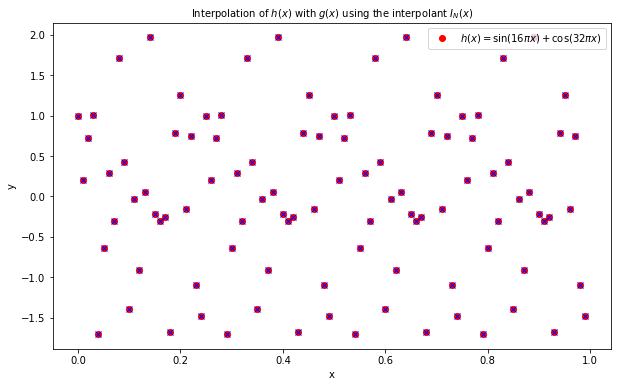

In [39]:
N = 100
x = np.linspace(0, 1, N, endpoint = False)
si  = h(x)

ckf = fft(f(x, N), norm='forward')
a = interpolate(si, ckf)
g_interpolate = g(a, x, N)

plt.figure(figsize=(10,6))
plt.title('Interpolation of $h(x)$ with $g(x)$ using the interpolant $I_N(x)$', size=10)
plt.plot(x, si, 'ro', label='$h(x) = \sin(16 \pi x) + \cos(32 \pi x)$')
plt.plot(x, g_interpolate, 'bx', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We see that using the linear combinations of the interpolant with shifts, we manage to interpolate the samples from $s(x_i) = h(x_i)$.

## Task 3: Interpolation and Signal Decomposition
### a
To find $c_k(D_n)$ we can use the definition of the coefficients:

$$c_k(f) = \int_{0}^{1} f e^{-2\pi i k x} dx$$

Now we can set $f$ equal to $D_n(x)$:

$$c_k = \int_{0}^{1} \frac{1}{2n+1} \sum_{m = -n}^{n} e^{2\pi i m x} e^{-2\pi i k x} dx$$

We can rearrange:

$$c_k = \frac{1}{2n + 1}  \sum_{m = -n}^{n} \int_{0}^{1}e^{2\pi i m x} e^{-2\pi i k x} dx$$

We recognise this integral from 1a, and know that it is the inner product:

$$\left<e^{2\pi i m x},e^{2\pi i k x}   \right> = \begin{cases}
              1, \quad \text{for} \; m = k \\
              0, \quad \text{else}
\end{cases}$$

Since we are summing over all m in $[-n,n]$, as long as $k$ is in this interval as well, we will get $c_k$ equal to $\frac{1}{2n+1}$. And 0 if this is not the case.

$$c_k(D_n) = \begin{cases}
    \frac{1}{2n+1}, &\quad \text{for} \; -n \leq k \leq n\\
    0, &\quad  \text{else}
\end{cases}$$

Now, to proving that the fundamental interpolant in $V_{2n+1, D_n}$ exists. We know that this interpolant exists in $V_{N,f}$ iff. $\sum_{z \in \mathbb{Z}} c_{h + Nz}(f) \neq 0$. Where $h \in \mathbb{N}_0$ So we have to check the sum:

$$\begin{align*}
\sum_{z \in \mathbb{Z}} c_{h + (2n+1)z} (D_n)
&= (\hat{D_n})_h \\
&= \frac{1}{2n+1} \sum_{j=0}^{2n} D_n(\frac{j}{2n+1}) e^{-2 \pi i h j / (2n+1)} \\
&= \frac{1}{2n+1} \sum_{j=0}^{2n} \frac{1}{2n+1} \sum_{k=-n}^n e^{2 \pi i k j / (2n+1)} e^{-2 \pi i h j / (2n+1)} \\
&= \frac{1}{2n+1} \frac{1}{2n+1} \sum_{j=0}^{2n} \sum_{k=-n}^n e^{2 \pi i (k - h) j / (2n+1)} \\
&= \frac{1}{2n+1} \frac{1}{2n+1} \sum_{j=0}^{2n} \sum_{k=-n}^n \begin{cases} 1, \quad \text{if} \; (k-h) \mod{2n+1} = 0 \\ 0, \quad \text{else} \end{cases}
\end{align*}$$

Where $(k-h) \mod{2n+1} = 0$, occurs only one time when $k=h$, therefore:

$$\begin{align*}
\sum_{z \in \mathbb{Z}} c_{h + (2n+1)z} (D_n)
&= \frac{1}{2n+1} \frac{1}{2n+1} \sum_{j=0}^{2n} 1 \\
&= \frac{1}{2n+1} \ne 0 \qquad \square
\end{align*}$$

Which is equivalent with the discrete fourier coefficients:

$$(\hat{D_n})_h = c_h(D_n)$$

The fundamental interpolant therefore exists in $V_{2n+1, D_n}$, hence using previous results:

$$c_k(I_{2n+1}) = (2n+1) \hat{a}_h c_k(D_{n})$$

$$\hat{a}_h = \frac{1}{(2n+1)^2 (\hat{D_n})_h}$$

Putting together and using the coefficients to find $I_{2n+1}$:

$$\begin{align*}
I_{2n+1} &= \sum_{k=-n}^n c_k(I_{2n+1}) e^{-2 \pi i k x} \\
&= \sum_{k=-n}^n \frac{1}{2n+1} e^{-2 \pi i k x} \\
&= \frac{1}{2n+1} \sum_{k=-n}^n e^{-2 \pi i k x} \\
&= D_n(x)
\end{align*}$$

The dirichlet kernel is therefore its own interpolant. For $2n + 1$ sampling points, the interpolant is $1$ at the first point and $0$ for the remaining $2n$ points.

Plotting for $n = 5, 10, 17$:

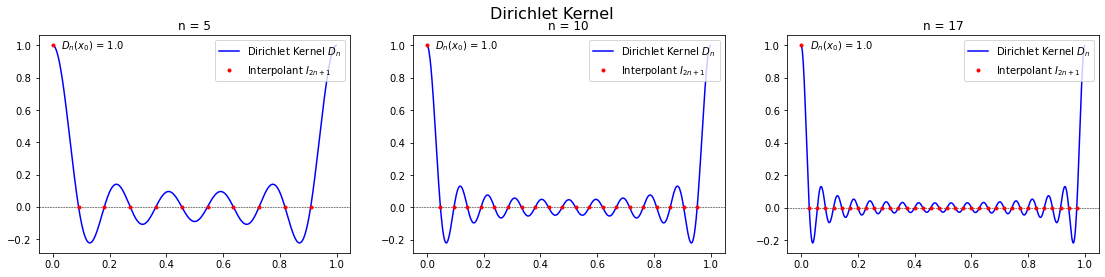

In [40]:
n = [5, 10, 17]

def Dn(x,n):
    return np.real(np.divide([np.sum([np.exp(2j*np.pi*k*xi) for k in range(-n,n+1)]) for xi in x], 2*n + 1))

x = np.linspace(0, 1, 1000, endpoint=False)

fig, axs = plt.subplots(1, len(n), figsize=(19,4))
fig.suptitle('Dirichlet Kernel', size=16)
for i in range(len(n)):
    d = Dn(x, n[i])
    axs[i].set_title(f'n = {n[i]}')
    axs[i].plot(x, d, 'b', label='Dirichlet Kernel $D_n$')
    axs[i].axhline(0, color='black', linestyle = '--', linewidth=0.5)
    axs[i].text(0.03, d[0]*0.98, f'$D_n(x_0)$ = {round(d[0],4)}')
    x_int = np.linspace(0, 1, 2*n[i]+1, endpoint = False)
    I = Dn(x_int, n[i])
    axs[i].plot(x_int, I, 'r.', label='Interpolant $I_{2n+1}$')
    axs[i].legend(loc='upper right')
plt.show()


### b

$I_{2n}$ exists in $V_{2n,D_n}$ iff:

$$\sum_{z \in \mathbb{Z}} c_{h + Nz} (D_n) \ne 0$$

We calculate the coefficients:

$$\begin{align*}
\sum_{z \in \mathbb{Z}} c_{h + Nz} (D_n) 
&= (\hat{D_n})_h \\
&= \frac{1}{2n} \sum_{j=0}^{2n-1} D_n(\frac{j}{2n}) e^{-2 \pi i h j / 2n} \\
&= \frac{1}{2n} \sum_{j=0}^{2n-1} \sum_{k=-n}^n \frac{1}{2n+1} e^{2 \pi i k j / 2n} e^{-2 \pi i h j / 2n} \\
&= \frac{1}{2n} \frac{1}{2n+1} \sum_{j=0}^{2n-1} \sum_{k=-n}^n e^{2 \pi i (k-h) j / 2n} \\
&= \frac{1}{2n} \frac{1}{2n+1} \sum_{j=0}^{2n-1} \sum_{k=-n}^n \begin{cases} 1, \quad \text{for} \; (k-h)\mod{2n} = 0 \\ 0, \quad \text{else} \end{cases}
\end{align*}$$

$(k-h) \mod{2n} = 0$ occurs two times for when $h=\pm n$, which sum both $k=-n$ and $k=n$, otherwise just when $k=h$. Hence,

$$\sum_{z \in \mathbb{Z}} c_{h + Nz} (D_n) = \begin{cases} \frac{2}{2n+1}, \quad \text{for} \; h=\pm n \\ \frac{1}{2n+1}, \quad \text{else} \end{cases}$$

Which gives a nonzero summation, and implies $I_{2n} \in V_{2n, D_n}$. 

We can therefore use previous results to calculate the interpolant:

$$\hat{a}_h = \frac{1}{(2n)^2 (\hat{D_n})_h}$$

$$c_k(I_{2n}) = 2n \hat{a}_h c_k(D_n)$$

$$c_k(D_n) = \frac{1}{2n+1}$$

Putting together:

$$\begin{align*}
I_{2n} &= \sum_{k \in \mathbb{Z}} c_k(I_{2n}) e^{2 \pi i k x} \\
&= \sum_{k=-n}^n \frac{c_k(D_n)}{2n (\hat{D_n})_h} e^{2 \pi i k x} \\
&= \frac{1}{2n} \sum_{k=-n}^n e^{2 \pi i k x} \begin{cases} \frac{1}{2} \quad \text{for} \; k=\pm n \\ 1 \quad \text{else} \end{cases} \\
&= \frac{1}{2n}(\frac{1}{2} (e^{2 \pi i n x} + e^{-2 \pi i n x}) + \sum_{k=-n+1}^{n-1} e^{2 \pi i k x}) \\
&= \frac{1}{2n} (\cos(2 \pi n x) + \sum_{k=-n+1}^{n-1} e^{2 \pi i k x})
\end{align*}$$

Defining the modified dirichlet kernel as:

$$\tilde{D_n}(x) = I_{2n}$$

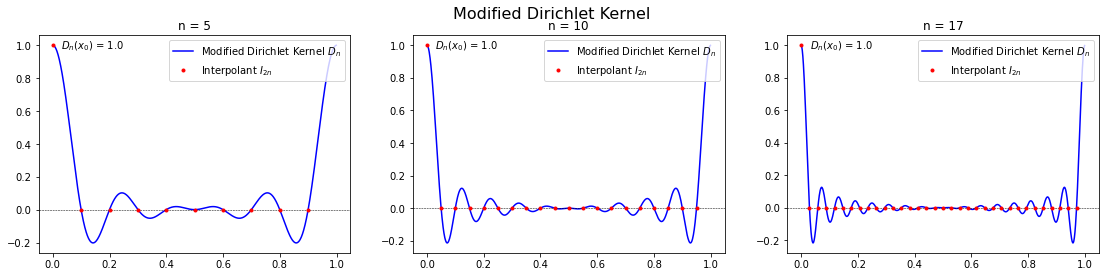

In [41]:
n = [5, 10, 17]

def Dn_modified(x, n):
    return np.real(np.divide([np.cos(2*np.pi*n*xi) + np.sum([np.exp(2*np.pi*1j*k*xi) for k in range(-n+1,n)]) for xi in x], 2*n))

x = np.linspace(0, 1, 1000, endpoint=False)

fig, axs = plt.subplots(1, len(n), figsize=(19,4))
fig.suptitle('Modified Dirichlet Kernel', size=16)
for i in range(len(n)):
    d = Dn_modified(x, n[i])
    axs[i].set_title(f'n = {n[i]}')
    axs[i].plot(x, d, 'b', label='Modified Dirichlet Kernel $D_n$')
    axs[i].axhline(0, color='black', linestyle = '--', linewidth=0.5)
    axs[i].text(0.03, d[0]*0.98, f'$D_n(x_0)$ = {round(d[0],4)}')
    x_int = np.linspace(0, 1, 2*n[i], endpoint = False)
    I = Dn_modified(x_int, n[i])
    axs[i].plot(x_int, I, 'r.', label='Interpolant $I_{2n}$')
    axs[i].legend(loc='upper right')
plt.show()

What changes in this case with the Modified Dircichlet Kernel is that we interpolate with an even number of points, in contrast to the previous case where we had an odd number. The number of points where the kernel crosses the $x$-axis is reduced by one, corresponding to a reduction in interpolation points. This results to an interpolant for odd $2n$ samples.


For interpolation we construct a function $g(x)$:

$$g(x) = \sum_{i=0}^{2n-1} s_i \tilde{D_n} (x - \frac{i}{2n})$$

, which interpolates the points $s_0, s_1, \dots, s_{2n-1}$ for the known values $x_0, x_1, \dots, x_{2n-1}$.

Writing $g(x)$ as:

$$g(x) = \sum_{i=0}^{2n-1} a_i \tilde{D_n} (x - \frac{i}{2n})$$

As same as previous calculations we calculate the vector **$a$** such that:

$$c_k(g) = 2n \hat{a}_h c_k(I_{2n}) $$

hence,

$$(\hat{g})_h = 2n \hat{a}_h (\hat{\tilde{D_n}})_h$$

where **$a$** is:

$$\hat{a}_h = \frac{\hat{g}_h}{2n (\hat{D_n})_h} = \frac{\hat{g}_h}{2n \sum_{z \in \mathbb{Z}} c_{h + 2nz} (D_n)}$$

And then constructing $g$:

$$g = \mathcal{F}^{-1} (2n \hat{a} (\hat{\tilde{D_n}})_h)$$

For extending the vector $a$, we create a vector $b$, which is $a$ in the center and $0$ at the ends. We therefore have to shift them in order to use operations together.

In [42]:
def g(a, ckf):
    N = len(a)
    L = len(ckf)
    p = (L - N)//2
    a_hat = fftshift(fft(a, norm='forward'))
    b_hat = np.zeros_like(ckf)
    b_hat[p:p + N] = a_hat
    b_hat = fftshift(b_hat)
    return np.real(ifft(N*b_hat*ckf, norm='forward'))

In [43]:
data = pandas.read_csv('project2-data/signals.csv')
s5 = data['s5'].tolist()

n = len(s5)//2
x = np.linspace(0, 1, 2*n, endpoint=False)
x_ext = np.linspace(0, 1, 8*n, endpoint=False)

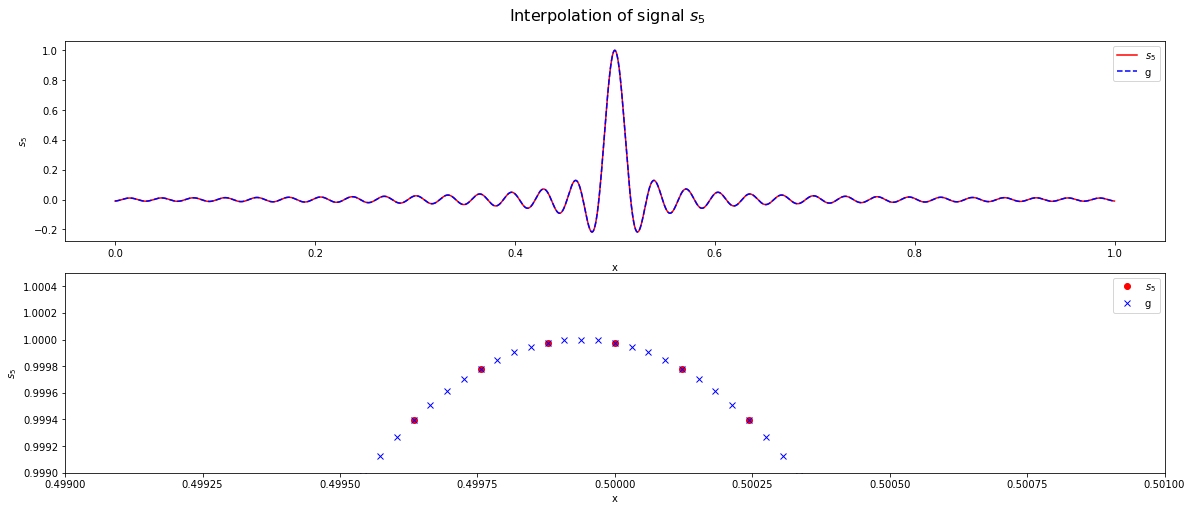

In [44]:
ckf = np.full(8*n, 1/(2*n+1), dtype = complex)

a = interpolate(s5, ckf)
g_interpolate = g(a, ckf)

fig, axs = plt.subplots(2, figsize=(16,7))
fig.suptitle('Interpolation of signal $s_5$', size = 16)
fig.tight_layout()

axs[0].plot(np.real(x), s5, 'r', label='$s_5$')
axs[0].plot(np.real(x_ext), np.real(g_interpolate), 'b--', label='g')

axs[1].plot(np.real(x), s5, 'ro', label='$s_5$')
axs[1].plot(np.real(x_ext), np.real(g_interpolate), 'bx', label='g')
axs[1].set_xlim((0.499, 0.501))
axs[1].set_ylim((0.999, 1.0005))

for i in range(2):
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('$s_5$')
    axs[i].legend()
plt.show()

We see from the plot that we have achieved a higher resolution of the signal $s_5$, where there are three interpolating points inbetween two points from $s_5$.

### c

We know from 2e) that $D_{n/2} \in V_{2n,D_n}$ is equivalent to  
$$
c_k(D_{n/2}) = \left (
\sum_{j=0}^{2n-1} a_j e^{-2πikj/n} 
\right ) c_k(D_n) = 2n\hat{a}_h c_k(D_n) \quad (*)
$$

We assume that $(*)$ holds. Then $D_{n/2} \in V_{2n,D_n}$, meaning we can find $\mathbf{a}$. If we manage to find an expression for $\mathbf{a}$ such that $(*)$ holds, then $D_{n/2} \in V_{2n,D_n}$. Firstly we calculate $c_k(D_n)$ and $c_k(D_{n/2})$.

$$
c_k(D_n) = \left < D_n, e^{2πikx} \right > = \left < \frac{1}{2n+1} \sum_{j=-n}^{n} e^{2πijx}, e^{2πikx} \right > = \frac{1}{2n+1} \sum_{j=-n}^{n} \left <  e^{2πijx}, e^{2πikx} \right > \\
$$

We recognize the inner-product from 1a). This yields
$$
\frac{1}{2n+1} \sum_{j=-n}^{n} \left <  e^{2πijx}, e^{2πikx} \right > = 
\begin{cases}
 1/(2n+1)& \text{ if }  -n \leq k \leq n\\
 0& \text{ else }
\end{cases}
$$

Next, we compute $c_k(D_{n/2})$

$$
c_k(D_{n/2}) = \left < D_{n/2}, e^{2πikx} \right > = \left < \frac{1}{n+1} \sum_{j=-n/2}^{n/2} e^{2πijx}, e^{2πikx} \right > = \frac{1}{n+1} \sum_{j=-n/2}^{n/2} \left <  e^{2πijx}, e^{2πikx} \right > 
$$

Using the result from 1a) we get

$$
\frac{1}{n+1} \sum_{j=-n/2}^{n/2} \left <  e^{2πijx}, e^{2πikx} \right > = 
\begin{cases}
 1/(n+1)& \text{ if }  \frac{-n}{2} \leq k \leq \frac{n}{2}\\
 0& \text{ else }
\end{cases}
$$
Now that we have $c_k(D_{n/2}), c_k(D_{n})$ we can use $(*)$ to express $\hat{a}_h$

$$
c_k(D_{n/2}) = 2n \hat{a}_h c_k(D_n) \implies \hat{a}_h = \frac{c_k(D_{n/2})}{2nc_k(D_n)} = \frac{2n+1}{2n(n+1)}, \quad \frac{-n}{2} \leq k \leq \frac{n}{2}
$$

Let $h = k -2nz$ for $z \in \mathbb{Z}, h \in {\left\{0,..., 2n-1 \right\} }$. In order to define $\hat{\mathbf{a}}$, we have to find the $h$-values such that $k \geq \frac{-n}{2}$ and $k \leq \frac{n}{2}$.

$\underline{k \geq \frac{-n}{2}}:$ 

$$
h + 2nz \geq \frac{-n}{2} \implies h \geq \frac{-4nz-n}{2} \quad \overset{z = -1}{\implies} h \geq \frac{3n}{2}
$$

$\underline{k \leq \frac{n}{2}}:$ 

$$
h + 2nz \leq \frac{n}{2} \implies h \leq \frac{n-4nz}{2} \quad \overset{z = 0}{\implies} h \leq \frac{n}{2}
$$

With this we get 

$$
\hat{a}_h =
\begin{cases}
\frac{2n+1}{2n(n+1)}& \text{ if }  h = 0,1,..., n/2, h = 3n/2,...2n-1\\
 0& \text{ else }
\end{cases}
$$

Finally we have that 

$$
\mathbf{a} = \mathcal{F}_{2n}^{-1} \hat{\mathbf{a}} \implies a_h = \left ( \mathcal{F}_{2n}^{-1}\hat{\mathbf{a}} \right )_h
$$

Consequently, $D_{n/2} \in V_{2n, D_n}$. Hence, we can express $D_{n/2}$:

$$
D_{n/2} = \sum_{j=0}^{2n-1}a_jD_n(x-\frac{j}{2n}) = \sum_{j=0}^{2n-1}a_j \tau_{2n}^j D_n(x)
$$

Lastly, we are going to show that $V_{n,D_{n/2}} \subset V_{2n, D_n}$. The space $V_{n,D_{n/2}}$ is given by:

$$
V_{n,D_{n/2}} = \textrm{span}(D_{n/2}(x), \tau_n D_{n/2}(x), \tau_n^{2}D_{n/2}(x),...,\tau^{n-1}_n D_{n/2}(x))
$$

with

$$
\tau_{n}^{k}D_{n/2}(x) = \tau_{n}^{k} \sum_{j=0}^{2n-1}a_jD_n(x-\frac{j}{2n}) = \sum_{j=0}^{2n-1}a_jD_n(x-\frac{j+2k}{2n}) \quad (I)
$$

On the other hand, $V_{2n,D_{n}}$ is given by:

$$
V_{2n,D_{n}} = \textrm{span}(D_{n}(x), \tau_{2n} D_{n}(x), \tau_{2n}^{2}D_{n}(x),...,\tau^{2n-1}_{2n} D_{n}(x))
$$

with

$$
\tau_{2n}^{k}D_{n}(x) = D_n(x-\frac{k}{2n}) \quad (II)
$$


We have that rank($V_{n, D_{n/2}}$) = $n < $ rank($V_{2n, D_n}$) = $2n$. In addition, we see from $(I)$ and $(II)$ that all elements in $V_{n, D_{n/2}}$ is spanned by elements in $V_{2n, D_n}$. Consequently, we have that $V_{n, D_{n/2}}$ is a proper subset of $V_{2n, D_n}$. 

### d
Want to show that the space $W_{n, E_{n/2}}$ is orthogonal to $V_{n, D_{n/2}}$. First we show that $\left < E_{n/2}, D_{n/2} \right > = 0$. We use Parsevals identity.

$$
\left < E_{n/2}, D_{n/2} \right > = \sum_{k \in \mathbb{Z}} c_k(E_{n/2})\overline{c_k(D_{n/2})} = \sum_{z \in \mathbb{Z}} \sum_{n=0}^{2n-1}c_{h+Nz}(E_{n/2}) c_{h+Nz}(D_{n/2})\\
=2n \sum_{z \in \mathbb{Z}} \sum_{n=0}^{2n-1} \hat{a}_{h+n \text{ mod } N} e^{-hπi/n} c_{h+Nz}(D_{n}) c_{h+Nz}(D_{n/2})
$$

We know both $c_{h+Nz}(D_{n}), c_{h+Nz}(D_{n/2})$ from 3c). In addition we use $N=2n$. 

$$
\implies \frac{2n}{(2n+1)(n+1)} \sum_{z \in \mathbb{Z}} \sum_{n=0}^{2n-1} \hat{a}_{h+n \text{ mod } N} e^{-2hπi/N} 
$$

If we use the result from 1f, we have that $\sum_{n=0}^{2n-1} e^{-2hπi/N} = 0$ since $1 \text{ mod } N \not\equiv 0$. Hence:

$$
\sum_{z \in \mathbb{Z}} \sum_{n=0}^{2n-1} \hat{a}_{h+n \text{ mod } N} e^{-2hπi/N}  = 0 

\implies \left < E_{n/2}, D_{n/2} \right > = 0 
$$

Now we have to show that for a given translate $\left < \tau_{n}^{j}E_{n/2}, \tau_{n}^{k} D_{n/2} \right > = 0$. This is a bit harder, but if we had managed to do this we would have showed that the two spaces are orthogonal to each other. We were not able to do this. We were only able to show it for the case with j=k=0, as showed above.

Furthermore, we want to show that the translates $\tau_n^{j}E_{n/2}$ are linearly independent. We know from 2d) that a set of translates are lineraly independent if 
$$\sum_{z \in \mathbb{Z}} \left | c_{r+zN}(f) \right |^2 > 0, \quad r = 0,..,N-1$$

In our case we have to show that:

$$
\sum_{z \in \mathbb{Z}} \left | c_{l+nZ}(E_{n/2})\right |^2 > 0
$$

We use the information from the task, and get:

$$
\sum_{z \in \mathbb{Z}} \left | c_{l+nZ}(E_{n/2})\right |^2 = N^2 \sum_{z \in \mathbb{Z}} \left | \hat{a}_{l+n \text{ mod } n} c_{l+nZ}(D_n)\right |^2 \\
= N^2 \sum_{z \in \mathbb{Z}} \left | \hat{a}_{l + n + zn} c_{l+nZ}(D_n)\right |^2 
= N^2 \sum_{z \in \mathbb{Z}} \left | \hat{a}_{l + n + zn}\right |^2 \left | c_{l+nZ}(D_n)\right |^2 
$$

We see that for at least one $l$ we get that both squared terms above are non-zero. Hence, we get that the sum is non-zero, and the condition stated above are fulfilled. We then now that the translates $\tau_n^{j}E_{n/2}$, $j=0,...,n-1$ are linearly independent.

### e

The dimentions of $V_{n,D_\frac{n}{2}}$ and $W_{n,E_\frac{n}{2}}$ are $n$, and the dimention of $V_{2n,D_n}$ is $2n$. Since they are both orthogonal and both are subspaces of $V_{2n,D_n}$, their dimention sums up to $2n$, hence their direct sum equals $V_{2n,D_n}$:

$$V_{n,D_\frac{n}{2}} \oplus W_{n,E_\frac{n}{2}} = V_{2n,D_n}$$

Finding $W_{n,E_\frac{n}{2}}$:

$$W_{n,E_\frac{n}{2}} = V_{2n,D_n} \ominus V_{n,D_\frac{n}{2}}$$

By induction one can prove then that for any $V_{\frac{n}{2^{j-1}},D_\frac{n}{2^j}}$ and $W_{\frac{n}{2^{j-1}},E_\frac{n}{2^j}}$, where $j=1,2,\dots$, then:

$$V_{\frac{n}{2^{j-1}},D_\frac{n}{2^j}} \oplus W_{\frac{n}{2^{j-1}},E_\frac{n}{2^j}} = V_{\frac{2n}{2^{j-1}},D_\frac{n}{2^{j-1}}}$$

Which follows that:

$$ W_{\frac{n}{2^{j-1}},E_\frac{n}{2^j}} = V_{\frac{2n}{2^{j-1}},D_\frac{n}{2^{j-1}}} \ominus V_{\frac{n}{2^{j-1}},D_\frac{n}{2^j}}, \quad \forall j = 1,2,\dots, r, \quad \exists \; r \; \text{s.t.} n=2^r$$

Implementing a decomposition functions which generates $D_\frac{n}{2^j}$, and a function which returns $E_\frac{n}{2^j}$ using results just showed.

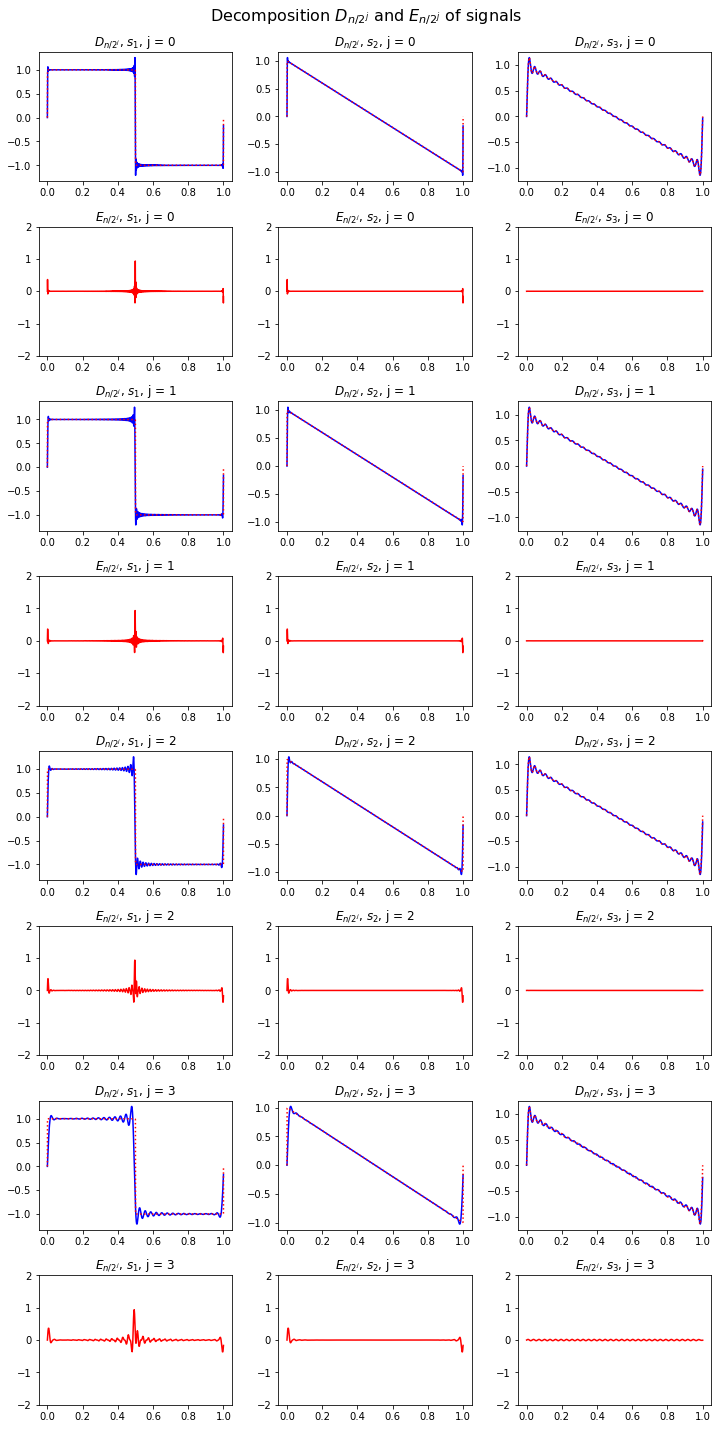

In [45]:
n = 512
N = 2*n

def decomp(signal, n, j):
    n = int(n//(2**j))
    N = 2*n
    s = signal[::len(signal)//n]
    ckf = np.full(4*N, 1/(2*n+1), dtype = complex)
    a = interpolate(s, ckf)
    D = g(a, ckf)
    return D

def En(signal, Dn, n, j):
    D2n = decomp(signal, n, j-1)
    return D2n[::2] - Dn

s1 = data['s1'].tolist()
s2 = data['s2'].tolist()
s3 = data['s3'].tolist()
signals = [s1,s2,s3]

fig, axs = plt.subplots(8, 3, figsize=(10,20))
fig.suptitle('Decomposition $D_{n/2^j}$ and $E_{n/2^j}$ of signals', size=16, y=0.99)

x_cont = np.linspace(0, 1, len(s3))

for i in range(len(signals)):
    for j in range(4):
        x = np.linspace(0, 1, 4*N//2**j)
        s_decomp = decomp(signals[i], n, j)
        E_decomp = En(signals[i], s_decomp, n, j)

        axs[2*j,i].plot(x, s_decomp, 'b')
        axs[2*j,i].set_title('$D_{n/2^j}$'+f', $s_{i+1}$'+f', j = {j}')
        axs[2*j,i].plot(x_cont, signals[i], 'r', linestyle='dotted')

        axs[2*j+1,i].plot(x, E_decomp, 'r')
        axs[2*j+1,i].set_title('$E_{n/2^j}$'+f', $s_{i+1}$'+f', j = {j}')
        axs[2*j+1,i].set_ylim(-2,2)

fig.tight_layout()
plt.show()


## Task 4

In this task we are going to perfrom the 2D discrete Fourier transform on some given images.

### a

First we apply the 2D Fourier transform on the given images barbara.gif and klaus.gif. In the two cells bellow we load the images, and then we compute the 2D Fourier transform using Scipy's 2D fast Fourier transform. In this task we are going to split the images into a phase- matrix P and an Amplitude-matrix A, so that we can study what happens when we exchange the phases of the two images. In order to do this, we have implemented two functions split_matrix() and combine_AP(). After computing the Fourier Transform with Scipy's functions, we get a complex matrix in return. Hence we have to plot the real-part of this matrix. 

In [46]:
barbara = plt.imread("project2-data/barbara.gif") #reading the picture files
klaus = plt.imread("project2-data/klaus.gif")

In [47]:
klaus_fft = fft2(klaus) #in z = x + iy form, need in polar form.
barbara_fft = fft2(barbara)

In [48]:
def split_matrix(matrix):
    '''
    input: 2D Fourier transformed matrix 
    output: the transformed matrix splitted into an Amplitude-matrix A and a Phase-matrix P
    '''
    A = np.abs(matrix)
    P = np.angle(matrix)
    return A, P

def combine_AP(A,P):
    matrix = A * (np.exp(P*1j))
    return matrix

In [49]:
A_barbara, P_barbara = split_matrix(barbara_fft)
A_klaus, P_klaus = split_matrix(klaus_fft)

klaus_exchanged = combine_AP(A_klaus, P_barbara)
barbara_exchanged = combine_AP(A_barbara, P_klaus)

klaus_exchanged_ifft = ifft2(klaus_exchanged)
barbara_exchanged_ifft = ifft2(barbara_exchanged)

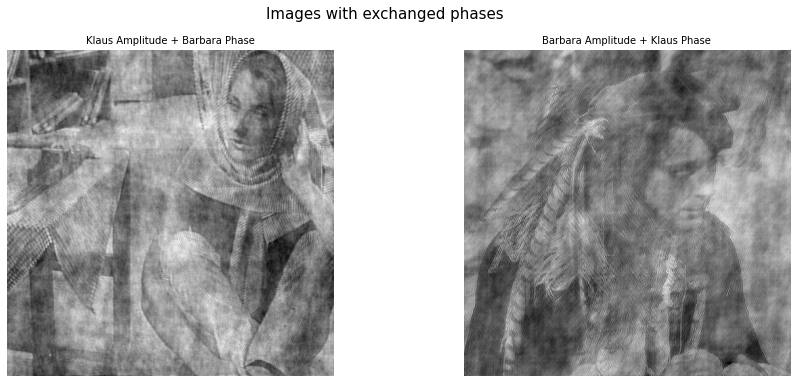

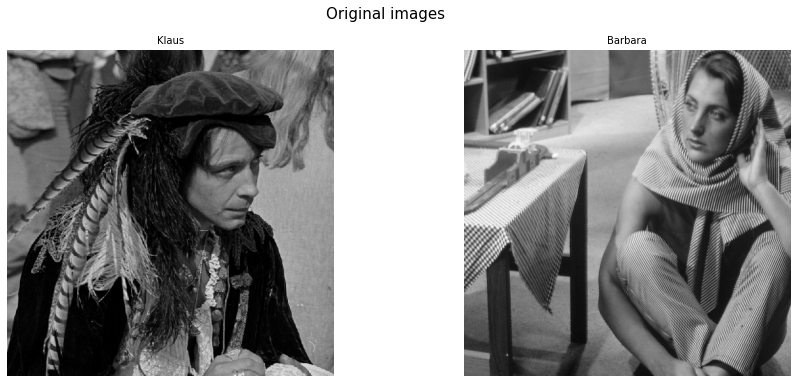

In [50]:
plt.figure(figsize=(15,6))
plt.suptitle("Images with exchanged phases", fontsize = 15)

plt.subplot(1,2,1)
plt.title("Klaus Amplitude + Barbara Phase", fontsize = 10)
plt.axis("off")
plot1 = plt.imshow(klaus_exchanged_ifft.real, cmap="gray")

plt.subplot(1,2,2)
plt.title("Barbara Amplitude + Klaus Phase", fontsize = 10)
plt.axis("off")
plot2 = plt.imshow(barbara_exchanged_ifft.real, cmap="gray")

plt.figure(figsize=(15,6))
plt.suptitle("Original images", fontsize = 15)

plt.subplot(1,2,1)
plt.title("Klaus", fontsize = 10)
plt.axis("off")
plot1 = plt.imshow(klaus, cmap="gray")

plt.subplot(1,2,2)
plt.title("Barbara", fontsize = 10)
plt.axis("off")
plot2 = plt.imshow(barbara, cmap="gray")

The exchange of phases resulted in two quite noisy images. Firstly, one can see that the image that the phase-matrix originally came from is the image that is most visible. This implies that the phase-matrix holds most of information from the orignal image.  

### b

In this task we want to use the 2D discrete Fourier transform to remove dithering from images. We will first consider the image yarimton.png and then the two others stated in the task description. One thing to notice is that when we loaded the Yarimton image, we got a matrix with 3 dimentions. Since the image is gray-tone, we only need a 2D matrix. Therefore we just used the 0'th entry from the 3rd channel, since this does not change the way the image-representation(because the image is black and white). 

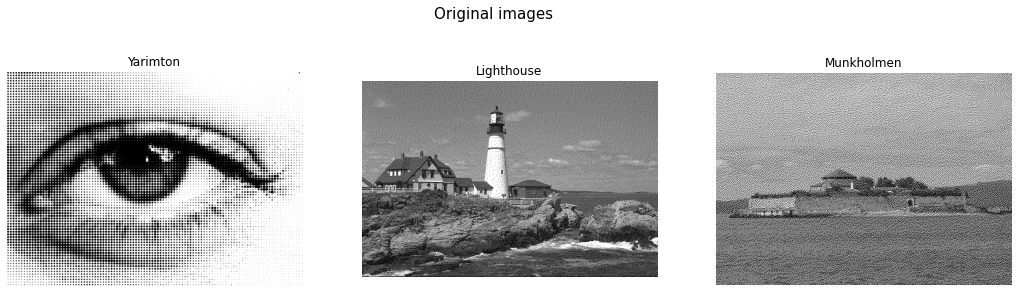

In [51]:
yarimton = plt.imread("project2-data/Yarimton-dithered.png")
lighthouse = plt.imread("project2-data/lighthouse-dithered.png")
munkholmen = plt.imread("project2-data/munkholmen-dithered.png")

plt.figure(figsize=(18,5))
plt.suptitle("Original images",  fontsize = 15)

plt.subplot(1,3,1)
plt.title("Yarimton")
plt.axis("off")
plot1 = plt.imshow(yarimton, cmap="gray")

plt.subplot(1,3,2)
plt.title("Lighthouse")
plt.axis("off")
plot2 = plt.imshow(lighthouse, cmap="gray")

plt.subplot(1,3,3)
plt.title("Munkholmen")
plt.axis("off")
plot3 = plt.imshow(munkholmen, cmap="gray")

Here we remove the 3rd channel:

In [52]:
yarimton = yarimton[:,:,0] #because of the gray scaling we only have to consider this channel

The first thing we want to do is to plot the Fourier-Amplituide (the amplitude in the frequency domain) of the Yarimton-image. The result is plotted below this cell. Note that for visualization purposes we plot the log() of the amplitude(log takes a wide range of values and compresses it down).

(-0.5, 1263.5, 913.5, -0.5)

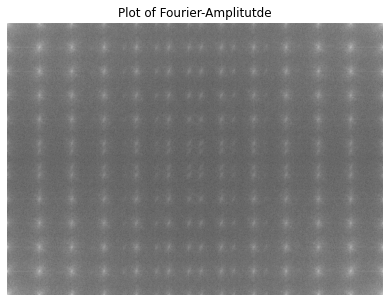

In [53]:
ft_yarimton = fft2(yarimton)

A_yarimton = split_matrix(ft_yarimton)[0]

plt.figure(figsize=(10,5))
Amplitude_plot = plt.imshow(np.log(A_yarimton.real), cmap = "gray") #log because of visualization purposes
plt.title("Plot of Fourier-Amplitutde")
plt.axis("off")

In [54]:
def gaussian_smoothing_filter(img, r):
    '''
    input: 
        img: original image array
        r: rate of smoothening 
    output:
        LPF_mask: low-pass filter mask using gaussian smoothing
    '''
    M,N = img.shape

    x = np.arange(N)
    y = np.arange(M)

    sx = N/r
    sy = M/r

    xmask = np.exp(-(x-N/2)**2 / (2*sx**2))
    ymask = np.exp(-(y-M/2)**2 / (2*sy**2))

    LPF_mask = np.outer(ymask, xmask) #low-pass filter mask
    return LPF_mask

def remove_dithering_fft(ft_img, LPF_mask):
    '''
    input: 
        dft_img: discrete fourier transform of an image
        LPF_mask: a low-pass filter mask
    output:
        inverse_LP: a matrix representing the filtered image
    '''
    
    ft_img_center = fftshift(ft_img) #have to center the image at the origin
    LP_Center = ft_img_center * LPF_mask #use the mask at this shifted function 
    LP_original = ifftshift(LP_Center) #shift the function back
    inverse_LP = ifft2(LP_original) #inverse fourier transform to obtain the filtered image
    
    return inverse_LP

The next step is to remove the dithering from the image. In order to do this we have to transform the image, such that we get the image in the frequency domain. Then we apply some filter, such that we remove the parts of the domain that contains the highest frequencies (these frequencies represent the dithering). After removing these frequencies, we compute the inverse Fourier transform such that we get our original image. We use something called the gaussian smoothing filter in order to remove the high frequencies. 

Below we have implemented two functions to remove the dithering. The approach described above is implemented in the function remove_dithering_fft(). It is worth noticing that when we use the Fast Fourier transfrom from Scipy's library, we get the origin in the corners of the matrix (here we consider the lowest frequency components as the origin). Hence we use the Fourier Shift function fft.fftshift so that we move the origin to the centre of the matrix. After doing this, the center part contains the lowest frequency components. This way we can apply the filter that we implemented below, such that high frequencies (not contained in the origin) are removed. Before inverse transforming the image, we have to use fft.ifftshift such that we inverse shift the image. Then we get the correctly shifted image in return when applying the inverse Fourier transform.

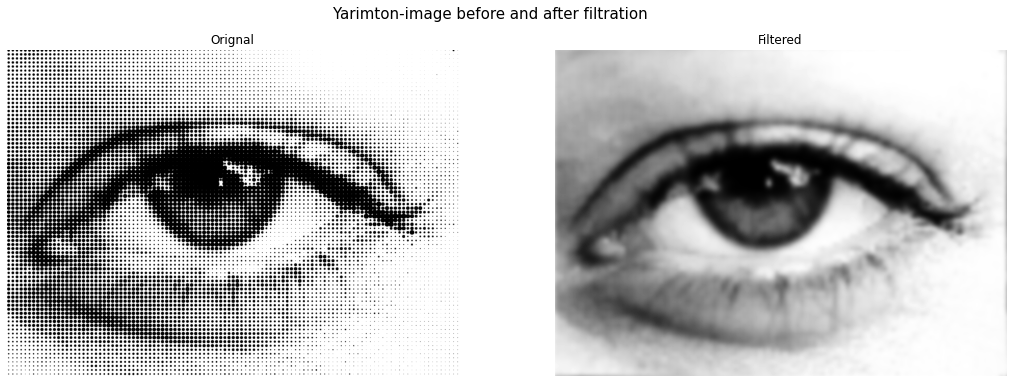

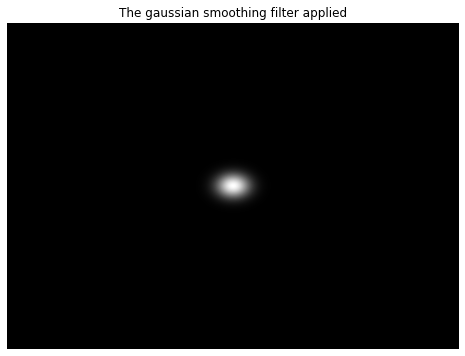

In [55]:
LPF_mask = gaussian_smoothing_filter(yarimton, 40)
filtered_yarimton = remove_dithering_fft(ft_yarimton, LPF_mask)

plt.figure(figsize=(18,6))
plt.suptitle("Yarimton-image before and after filtration",  fontsize = 15)

plt.subplot(1,2,1)
plt.title("Orignal")
plt.axis("off")
original = plt.imshow(yarimton, "gray")

plt.subplot(1,2,2)
plt.title("Filtered")
plt.axis("off")
filtered = plt.imshow(filtered_yarimton.real, "gray")

plt.figure(figsize=(18,6))
plt.title("The gaussian smoothing filter applied")
plt.axis("off")
filtered = plt.imshow(LPF_mask, "gray")

Above you can see the result after removing the dithering with the approach descibed earlier in this task. One can see that the dithering has been removed, and that the image still contains sharp edges. By changing the variable r in the Gaussian filter, one can controll how much of the frequencies you want to remove. If you decrease r, you will for example get more dithering. On the other hand, by inreasing r, the image gets more blurry, as the filter above filters out more and more frequencies. One have to balance this rate. 

Now we want to apply these techniques to the other two images. This is done below.

Filtering the lighthouse image:

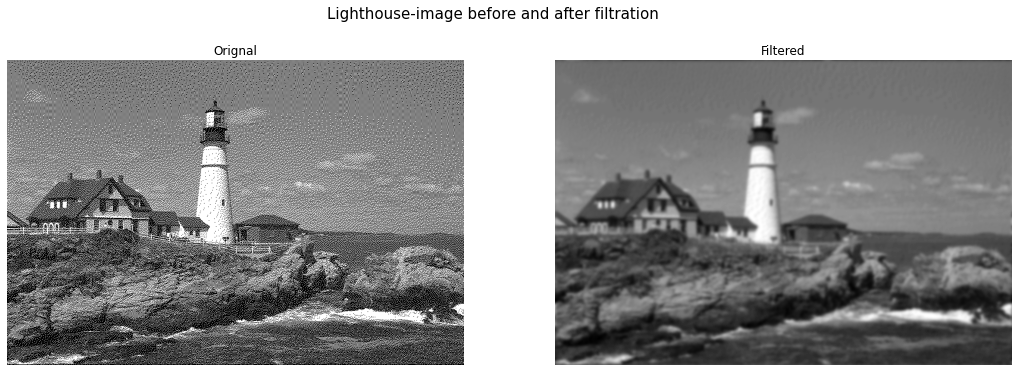

In [56]:
ft_lighthouse = fft2(lighthouse)

LPF_mask = gaussian_smoothing_filter(lighthouse, 15)
filtered_lighthouse = remove_dithering_fft(ft_lighthouse, LPF_mask)

plt.figure(figsize=(18,6))
plt.suptitle("Lighthouse-image before and after filtration",  fontsize = 15)

plt.subplot(1,2,1)
plt.title("Orignal")
plt.axis("off")
original = plt.imshow(lighthouse, "gray")

plt.subplot(1,2,2)
plt.title("Filtered")
plt.axis("off")
filtered = plt.imshow(np.abs(filtered_lighthouse), "gray")

Munkholmen:

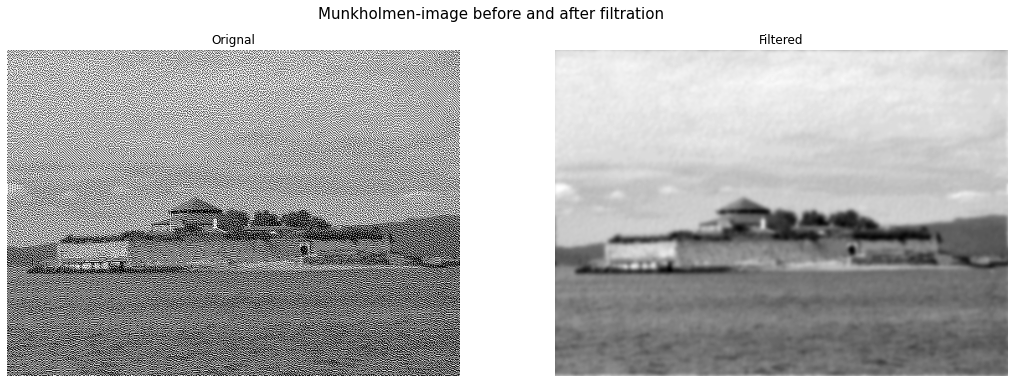

In [57]:
ft_munkholmen = fft2(munkholmen)

LPF_mask = gaussian_smoothing_filter(munkholmen, 14)
filtered_munkholmen = remove_dithering_fft(ft_munkholmen, LPF_mask)

plt.figure(figsize=(18,6))
plt.suptitle("Munkholmen-image before and after filtration",  fontsize = 15)

plt.subplot(1,2,1)
plt.title("Orignal")
plt.axis("off")
original = plt.imshow(munkholmen, "gray")

plt.subplot(1,2,2)
plt.title("Filtered")
plt.axis("off")
filtered = plt.imshow(filtered_munkholmen.real, "gray")

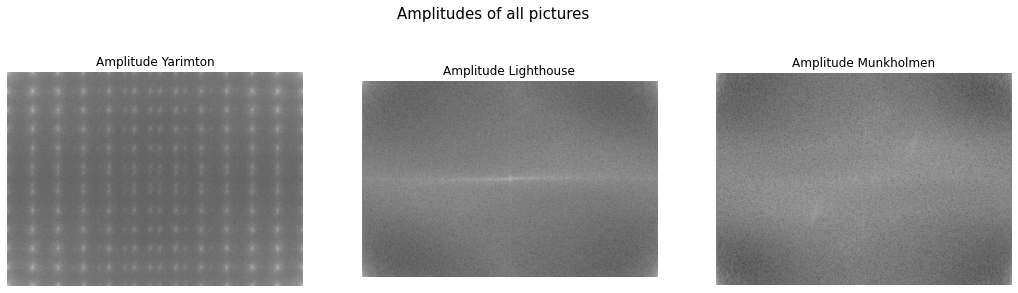

In [58]:
A_munkholmen = split_matrix(ft_munkholmen)[0]
A_lighthouse = split_matrix(ft_lighthouse)[0]

plt.figure(figsize=(18,5))
plt.suptitle("Amplitudes of all pictures",  fontsize = 15)

plt.subplot(1,3,1)
plt.title("Amplitude Yarimton")
plt.axis("off")
A_yar = plt.imshow(np.log(A_yarimton), "gray")

plt.subplot(1,3,2)
plt.title("Amplitude Lighthouse")
plt.axis("off")
A_lightH = plt.imshow(np.log(A_lighthouse), "gray")

plt.subplot(1,3,3)
plt.title("Amplitude Munkholmen")
plt.axis("off")
A_munkH = plt.imshow(np.log(A_munkholmen), "gray")

After studying the plotted images above, one can for sure see the Fourier transform technique removes the dithering. However, the removal of dithering makes the sharp edges in the images weaker as well. 

In addition, we have plotted the the different amplitudes above. 

### c

In this task we are going to state an idea how to write the spaces $V_{\mathbf{N},F}$ for the 2D case. We have a function $F(\mathbf{x}) = f_1(x_1)f_2(x_2)$, where $\mathbf{x} = (x_1,x_2)^T$. In order to determine what the space $V_{\mathbf{N}, F}$ looks like, we have to study the translates in 2D. Firstly, we have $\tau_{\mathbf{N}}^{\mathbf{j}}$, where $\mathbf{j} = (j_1, j_2)$ and $\mathbf{N} = (N_1,N_2)$.

$$
\implies  \tau_{\mathbf{N}}^{\mathbf{j}} F(\mathbf{x}) = \tau_{N_1}^{j_1}f_1(x_1) \tau_{N_2}^{j_2}f_2(x_2) = f_1(x_1- \frac{j_1}{N_1})f_2(x_2-\frac{j_2}{N_2})
$$

Hence, we get that $V_{\mathbf{N}, F}$ is on the form:
$$ 
V_{\mathbf{N}, F} = \textrm{span}\left(\tau_{\mathbf{N}}^{\mathbf{j}} F(\mathbf{x}) = f_1(x_1- \frac{j_1}{N_1})f(x_2-\frac{j_2}{N_2}) | j_1 = 0,1,...,N_1-1 \textrm{ and } j_2 = 0,1,.....,N_2-1\right)
$$

### d

In [59]:
def gaussian_smoothing_filter_HPF(img, r):
    '''
    input: 
        img: original image array
        r: rate of smoothening 
    output:
        LPF_mask: low-pass filter mask using gaussian smoothing
    '''
    M,N = img.shape

    x = np.arange(N)
    y = np.arange(M)

    sx = N/r
    sy = M/r

    xmask = 1- np.exp(-(x-N/2)**2 / (2*sx**2))
    ymask = 1- np.exp(-(y-M/2)**2 / (2*sy**2))

    HPF_mask = np.outer(ymask, xmask) #How-pass filter mask
    return HPF_mask

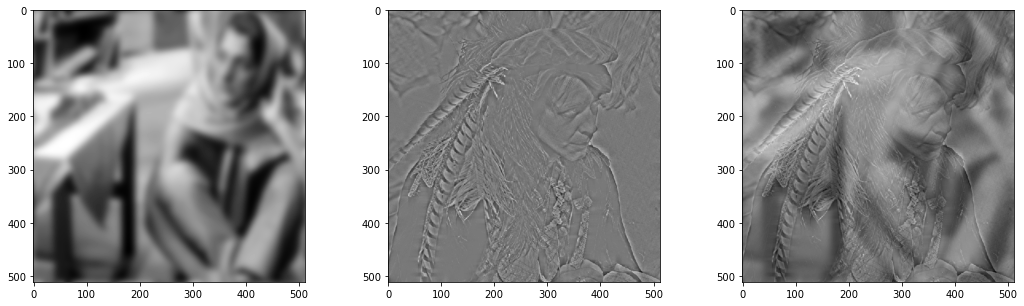

In [60]:
HPF = gaussian_smoothing_filter_HPF(klaus, 70)

LPF = gaussian_smoothing_filter(barbara, 40)

barbara_LPF = remove_dithering_fft(barbara_fft, LPF)
klaus_HPF = remove_dithering_fft(klaus_fft, HPF)

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(barbara_LPF.real, cmap="gray")

plt.subplot(1,3,2)
plt.imshow(klaus_HPF.real, cmap="gray")

plt.subplot(1,3,3)
plt.imshow((barbara_LPF + klaus_HPF).real, cmap="gray")

(-0.5, 1005.5, 1236.5, -0.5)

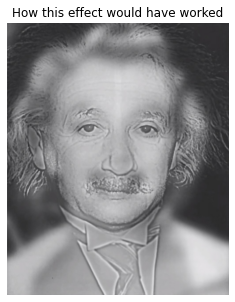

In [61]:
albert_monroe = plt.imread('Albert_Einstein_Optisk_Illusjon.jpeg')

plt.figure(figsize=(18,5))
plt.imshow(albert_monroe)
plt.title("How this effect would have worked")
plt.axis("off")